In [1]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/mie1624/assignment1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler as scaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn 
from sklearn import neighbors

In [0]:

import matplotlib
import matplotlib.pyplot as plt

In [0]:
#first of all i would like to figue out whats the question?
#it equals to group the columns and figue out different answer for the same problem
#by going back to the question row 
#all is index(start with 0)
#6-7
#11-19
#22-34
#35-47
#48-54
#56-68
#69-81
#82-96
#97-109
#110-115
#118-139
#140-147
#148-154
#155-167
#168-180
#181-193
#194-206
#207-219
#220-232
#233-245

In [5]:
df=pd.read_csv("Kaggle_Salary.csv")
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,Na

In [6]:
a=df.columns.tolist()
a

['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q2_OTHER_TEXT',
 'Q3',
 'Q4',
 'Q5',
 'Q5_OTHER_TEXT',
 'Q6',
 'Q7',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_OTHER_TEXT',
 'Q10',
 'Q11',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_Part_4',
 'Q12_Part_5',
 'Q12_Part_6',
 'Q12_Part_7',
 'Q12_Part_8',
 'Q12_Part_9',
 'Q12_Part_10',
 'Q12_Part_11',
 'Q12_Part_12',
 'Q12_OTHER_TEXT',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q13_OTHER_TEXT',
 'Q14',
 'Q14_Part_1_TEXT',
 'Q14_Part_2_TEXT',
 'Q14_Part_3_TEXT',
 'Q14_Part_4_TEXT',
 'Q14_Part_5_TEXT',
 'Q14_OTHER_TEXT',
 'Q15',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',


#Data cleaning and encode

1.1 drop other_text

we only need to know "other" is enough and tbh droping them has a benifit to do encoding。

In [7]:
# drop or the columns about other_text(we only need to know "other" is enough and tbh droping them has a benifit to do encoding
a=0
df1=df.copy()
for i in df.columns:
  if "TEXT" in i:
    df1=df1.drop(columns=[i])
    print(i)
    print(a)
  a=a+1

Q2_OTHER_TEXT
3
Q5_OTHER_TEXT
7
Q9_OTHER_TEXT
19
Q12_OTHER_TEXT
34
Q13_OTHER_TEXT
47
Q14_Part_1_TEXT
49
Q14_Part_2_TEXT
50
Q14_Part_3_TEXT
51
Q14_Part_4_TEXT
52
Q14_Part_5_TEXT
53
Q14_OTHER_TEXT
54
Q16_OTHER_TEXT
68
Q17_OTHER_TEXT
81
Q18_OTHER_TEXT
94
Q19_OTHER_TEXT
96
Q20_OTHER_TEXT
109
Q21_OTHER_TEXT
115
Q24_OTHER_TEXT
130
Q25_OTHER_TEXT
139
Q26_OTHER_TEXT
147
Q27_OTHER_TEXT
154
Q28_OTHER_TEXT
167
Q29_OTHER_TEXT
180
Q30_OTHER_TEXT
193
Q31_OTHER_TEXT
206
Q32_OTHER_TEXT
219
Q33_OTHER_TEXT
232
Q34_OTHER_TEXT
245


In [8]:
#from here we know that Q14 is not a simple choice question so we can take a look at it then we can decide to drop it or not
a=df.iloc[:,48:55]
a.loc[a['Q14'].isnull().values==True]
#seems that when Q14 is nan the text is always -1, so we can drop these columns because we only need Q14

,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT
8066,NaN,-1,-1,-1,-1,-1,-1
8070,NaN,-1,-1,-1,-1,-1,-1
8103,NaN,-1,-1,-1,-1,-1,-1
8104,NaN,-1,-1,-1,-1,-1,-1
8105,NaN,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
12490,NaN,-1,-1,-1,-1,-1,-1
12491,NaN,-1,-1,-1,-1,-1,-1
12492,NaN,-1,-1,-1,-1,-1,-1
12493,NaN,-1,-1,-1,-1,-1,-1


In [9]:
df1

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999"
1,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
2,391,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,NaN,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,14,">250,000"
3,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
4,470,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N

1.2 handle the missing value caused by single chioce question 

like we can see from the result most of the nan data appears because of single chioce setting. 
according to this situation, there will be only 2 unique answer for the feature(use such a thing or not(which will be nan)), 
so according to this condition, we can just use lable encode to handle these feature(only 0/1,will appear in the answer,we dont need a thrid one).

In [10]:
for i in df1.columns:
  print(df1[i].unique())
#like we can see from the result most of the nan data appears because of single chioce setting. 
#according to this situation, there will be only 2 unique answer for the feature(use such a thing or not(which will be nan)), 
#so according to this condition, we can just use lable encode to handle these feature(only 0/1,will appear in the answer,we dont need a thrid one). 

[  510   423   391 ... 33108 65270    88]
['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']
['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say']
['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Argentina' 'Turkey' 'Israel'
 'Taiwan' 'Egypt' 'Morocco' 'Hungary' 'Colombia' 'Norway' 'Thailand'
 'Switzerland' 'Viet Nam' 'Singapore' 'Bangladesh'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'China' 'Belgium'
 'Austria' 'Algeria' 'New Zealand' 'Tunisia' 'Philippines' 'Malaysia'
 'Republic of Korea' 'Denmark' 'Saudi Arabia']
['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree

In [0]:
#get the index of yes or no question
featurelist1=[] 
a=0
for i in df1.columns:
  if len(df1[i].unique())==2:
    featurelist1.append(a)
  a=a+1
# use the index to fit and transform the labels 
for i in featurelist1:
  k=df1.iloc[:,i]
  k=k.replace(np.nan,"0")#it should be a str because le cant deal with str and int together 
  k=le.fit_transform(k)
  df1.iloc[:,i]=k

In [12]:
#check again
for i in df1.columns:
  print(df1[i].unique())
#the nan caused by single chioce is removed 
#next step is to handle the real missing data

[  510   423   391 ... 33108 65270    88]
['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']
['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say']
['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Argentina' 'Turkey' 'Israel'
 'Taiwan' 'Egypt' 'Morocco' 'Hungary' 'Colombia' 'Norway' 'Thailand'
 'Switzerland' 'Viet Nam' 'Singapore' 'Bangladesh'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'China' 'Belgium'
 'Austria' 'Algeria' 'New Zealand' 'Tunisia' 'Philippines' 'Malaysia'
 'Republic of Korea' 'Denmark' 'Saudi Arabia']
['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree

1.3 handle the real missing value 

In [0]:
#first step to find where they are 
#get the index
featurelist2=[]
a=0
for i in df1.columns:
  if df1[i].isnull().any()==True:
    featurelist2.append(a)
  a=a+1


In [14]:
featurelist2

[18, 43, 44, 81, 99, 100]

In [0]:
#we need to plit the complete data and the data with missing value, perhaps we need to use knn or other classification model so we need to turn all the catagries data in to number 
df2=df1.copy()
dfformissingvalue=df2.drop(df2.columns[featurelist2],axis=1)


In [16]:
#first of all i wonder the index for each question to identify that one-hot encode or labels code is required.
for i in range(0,214):
  if len(dfformissingvalue.iloc[:,i].unique())>2:
    print(i,dfformissingvalue.iloc[:,i].unique())

0 [  510   423   391 ... 33108 65270    88]
1 ['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']
2 ['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say']
3 ['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Argentina' 'Turkey' 'Israel'
 'Taiwan' 'Egypt' 'Morocco' 'Hungary' 'Colombia' 'Norway' 'Thailand'
 'Switzerland' 'Viet Nam' 'Singapore' 'Bangladesh'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'China' 'Belgium'
 'Austria' 'Algeria' 'New Zealand' 'Tunisia' 'Philippines' 'Malaysia'
 'Republic of Korea' 'Denmark' 'Saudi Arabia']
4 ['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Docto

by the information print  above. we can see some feature is catagorical we need to turn them into numerical data.
what we should take  care  is that some of the catagorical can just simplify into 0,1,2,3 if they have level difference (like working year) or some need to use one-hot encode.
by review the information above we can know that index 1, 6 ,7 ,17 , 213 can use labels while   2,3,4,5,8 need use one-hot encode. 

data preparation

In [17]:
#just a quick check that can we just use label
indexlist=[1,6,7,17,213]
for i in indexlist:
  num=dfformissingvalue.iloc[:,i].unique()
  num.sort()
  print(num)
  num=le.fit_transform(num)
  print(num)
#seems that we need some handcraft to adjust the squence of each array

['18-21' '22-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-69' '70+']
[ 0  1  2  3  4  5  6  7  8  9 10]
['0-49 employees' '1000-9,999 employees' '250-999 employees'
 '50-249 employees' '> 10,000 employees']
[0 1 2 3 4]
['0' '1-2' '10-14' '15-19' '20+' '3-4' '5-9']
[0 1 2 3 4 5 6]
['$0-999' '1,000-1,999' '10,000-14,999' '100,000-124,999'
 '125,000-149,999' '15,000-19,999' '150,000-199,999' '2,000-2,999'
 '20,000-24,999' '200,000-249,999' '25,000-29,999' '250,000-299,999'
 '3,000-3,999' '30,000-39,999' '300,000-500,000' '4,000-4,999'
 '40,000-49,999' '5,000-7,499' '50,000-59,999' '60,000-69,999'
 '7,500-9,999' '70,000-79,999' '80,000-89,999' '90,000-99,999'
 '> $500,000']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
['0-9,999' '10,000-19,999' '100,000-124,999' '125,000-149,9991'
 '150,000-199,999' '20,000-29,999' '200,000-249,999' '30,000-39,999'
 '40,000-49,999' '50,000-59,999' '60,000-69,999' '70,000-79,999'
 '80,000-89,999' '90,000-

In [18]:
#i=1
num=dfformissingvalue.iloc[:,1].unique()
num.sort()
print(num)
num=le.fit_transform(num)
print(num)
#seems it works so we can apply it to the array directly
dfformissingvalue.iloc[:,1]=le.fit_transform(dfformissingvalue.iloc[:,1])

['18-21' '22-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-69' '70+']
[ 0  1  2  3  4  5  6  7  8  9 10]


In [19]:
dfformissingvalue

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,510,1,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,0,0,0,0,0,0,0,0,"30,000-39,999",1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"30,000-39,999"
1,423,5,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",1,1,1,1,0,0,0,0,"5,000-7,499",0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
2,391,5,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,0,0,0,0,0,0,0,0,"250,000-299,999",0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,">250,000"
3,392,1,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,"4,000-4,999",0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
4,470,7,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",0,0,1,0,0,1,0,0,"60,000-69,999",0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,"60,000-69,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,346,1,Male,India,Bachelor’s degree,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,"7,500-9,999",1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12493,88,2,Prefer not to say,Austria,No formal education past high school,Data Scientist,250-999 employees,1-2,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,"1,000-1,999",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12494,473,0,Male,India,Bachelor’s degree,Other,250-999 employees,3-4,I do not know,0,0,0,0,0,0,0,0,$0-999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12495,176,2,Male,India,Master’s degree,Statistician,50-249 employees,15-19,"We recently started using ML methods (i.e., mo...",0,0,0,0,0,0,0,1,"1,000-1,999",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"


In [20]:
#i=6
num=dfformissingvalue.iloc[:,6].unique()

print(num)
num=le.fit_transform(num)
print(num)
#so what we need is 1-3 4-4 0-0 3-1 2-2
dict1={1:3,4:4,0:0,3:1,2:2}
dfformissingvalue.iloc[:,6]=le.transform(dfformissingvalue.iloc[:,6])
dfformissingvalue.iloc[:,6]=dfformissingvalue.iloc[:,6].map(dict1)


['1000-9,999 employees' '> 10,000 employees' '0-49 employees'
 '50-249 employees' '250-999 employees']
[1 4 0 3 2]


In [21]:
#i=7
num=dfformissingvalue.iloc[:,7].unique()
num.sort()
print(num)
num=le.fit_transform(num)
print(num)
#still need to be done adjust
#what we want is 0-0 1-1 5-2 6-3 2-4 3-5 4-6
dict2={0:0,1:1,5:2,6:3,2:4,3:5,4:6}
dfformissingvalue.iloc[:,7]=le.transform(dfformissingvalue.iloc[:,7])
dfformissingvalue.iloc[:,7]=dfformissingvalue.iloc[:,7].map(dict2)

['0' '1-2' '10-14' '15-19' '20+' '3-4' '5-9']
[0 1 2 3 4 5 6]


In [22]:
#i=17
num=dfformissingvalue.iloc[:,17].unique()
num.sort()
print(num)
num=le.fit_transform(num)
print(num)
#still cant work and there is too much option so we can't use hand-made dict anymore, we need do some data-predealing

simplify=dfformissingvalue.iloc[:,17].tolist()
simplify
#remove the first item, 
for i in range(0,12497):
  if ">" in simplify[i]:
    simplify[i]="501,000"#why 501000 is because that 300000-500000 also contains 500000
  else:
    sal=simplify[i].split('-')
    if sal[1]=="999":
      simplify[i]="0,999"
    else:
      simplify[i]=sal[1]
dfformissingvalue.iloc[:,17]=simplify

#remove the"999",only left the 14XXX，so that it is easy for us to lael encode 
for i in range(0,12497):
  sal=simplify[i].split(',')
  simplify[i]=sal[0]

dfformissingvalue.iloc[:,17]=simplify


['$0-999' '1,000-1,999' '10,000-14,999' '100,000-124,999'
 '125,000-149,999' '15,000-19,999' '150,000-199,999' '2,000-2,999'
 '20,000-24,999' '200,000-249,999' '25,000-29,999' '250,000-299,999'
 '3,000-3,999' '30,000-39,999' '300,000-500,000' '4,000-4,999'
 '40,000-49,999' '5,000-7,499' '50,000-59,999' '60,000-69,999'
 '7,500-9,999' '70,000-79,999' '80,000-89,999' '90,000-99,999'
 '> $500,000']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [23]:

for i in range(0,12497):
  dfformissingvalue.iloc[i,17]=int(dfformissingvalue.iloc[i,17])


num=dfformissingvalue.iloc[:,17].unique()
num.sort()
print(num)
num=le.fit_transform(num)
print(num)
#it works now 
dfformissingvalue.iloc[:,17]=le.transform(dfformissingvalue.iloc[:,17])

[  0   1   2   3   4   7   9  14  19  24  29  39  49  59  69  79  89  99
 124 149 199 249 299 500 501]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [0]:
#i=213
#num=dfformissingvalue.iloc[:,213].unique()
#num.sort()
#print(num)
#num=le.fit_transform(num)
#print(num)
#still doesn't work, we may use the method we've before 
#simplify=dfformissingvalue.iloc[:,213].tolist()

#remove the first item, 
#for i in range(0,12497):
  #if ">" in simplify[i]:
   # simplify[i]="251,000"#why 251000 is to in case that other item contains 250,000
  #else:
   # sal=simplify[i].split('-')
    #simplify[i]=sal[1]
#dfformissingvalue.iloc[:,213]=simplify

#remove the"999",only left the 14XXX，so that it is easy for us to lael encode 
#for i in range(0,12497):
 # sal=simplify[i].split(',')
  #simplify[i]=sal[0]

#dfformissingvalue.iloc[:,213]=simplify


In [0]:
#for i in range(0,12497):
#  dfformissingvalue.iloc[i,213]=int(dfformissingvalue.iloc[i,213])


#num=dfformissingvalue.iloc[:,213].unique()
#num.sort()
#print(num)
#num=le.fit_transform(num)
#print(num)
#it works now 
#dfformissingvalue.iloc[:,213]=le.transform(dfformissingvalue.iloc[:,213])

In [25]:
#check it now

for i in dfformissingvalue.columns:
  print(dfformissingvalue[i].unique())

[  510   423   391 ... 33108 65270    88]
[ 1  5  7  8  3  0  4  2  6  9 10]
['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say']
['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Argentina' 'Turkey' 'Israel'
 'Taiwan' 'Egypt' 'Morocco' 'Hungary' 'Colombia' 'Norway' 'Thailand'
 'Switzerland' 'Viet Nam' 'Singapore' 'Bangladesh'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'China' 'Belgium'
 'Austria' 'Algeria' 'New Zealand' 'Tunisia' 'Philippines' 'Malaysia'
 'Republic of Korea' 'Denmark' 'Saudi Arabia']
['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree'
 'Some college/university study without earning a ba

seems that the question about country has too much answer which is too much for us to do one hot encoding , so we just use the coutry is developing or not to represent them

In [26]:
dfformissingvalue['Q3'].unique()

array(['France', 'India', 'Australia', 'United States of America',
       'Netherlands', 'Germany', 'Ireland', 'Russia', 'Greece', 'Ukraine',
       'Pakistan', 'Japan', 'Other', 'Brazil', 'South Korea', 'Belarus',
       'Nigeria', 'United Kingdom of Great Britain and Northern Ireland',
       'Sweden', 'Mexico', 'Canada', 'Portugal', 'Poland', 'Indonesia',
       'Italy', 'Czech Republic', 'Spain', 'Chile', 'Hong Kong (S.A.R.)',
       'South Africa', 'Argentina', 'Turkey', 'Israel', 'Taiwan', 'Egypt',
       'Morocco', 'Hungary', 'Colombia', 'Norway', 'Thailand',
       'Switzerland', 'Viet Nam', 'Singapore', 'Bangladesh',
       'Iran, Islamic Republic of...', 'Peru', 'Kenya', 'Romania',
       'China', 'Belgium', 'Austria', 'Algeria', 'New Zealand', 'Tunisia',
       'Philippines', 'Malaysia', 'Republic of Korea', 'Denmark',
       'Saudi Arabia'], dtype=object)

In [0]:

dictq3={'France':'EU',
        'India':'AS',
        'Australia':'AS',
        'United States of America':'NA',
        'Netherlands':'EU',
        'Germany':'EU',
        'Ireland':'EU',
        'Russia':'EU',
        'Greece':'EU',
        'Ukraine':'EU',
       'Pakistan':'AS', 
        'Japan':'AS', 
        'Other':'OTHER', 
        'Brazil':'SA', 
        'South Korea':'AS', 
        'Belarus':'EU',
       'Nigeria':'AF',
        'United Kingdom of Great Britain and Northern Ireland':'EU',
        'Sweden':'EU', 
        'Mexico':'NA', 
        'Canada':'NA', 
        'Portugal':'EU',
        'Poland':'EU', 
        'Indonesia':'AS',
       'Italy':'EU', 
        'Czech Republic':'EU', 
        'Spain':'EU', 'Chile':'SA',
        'Hong Kong (S.A.R.)':'AS',
       'South Africa':'AF',
        'Argentina':'SA',
        'Turkey':'EU',
        'Israel':'AS',
        'Taiwan':'AS', 
        'Egypt':'AF',
       'Morocco':'AF',
        'Hungary':'EU', 
        'Colombia':'AS',
        'Norway':'EU', 
        'Thailand':'AS',
       'Switzerland':'EU',
        'Viet Nam':'AS',
        'Singapore':'AS',
        'Bangladesh':'AS',
       'Iran, Islamic Republic of...':'AS',
        'Peru':'SA',
        'Kenya':'AF',
        'Romania':'EU',
       'China':'AS',
        'Belgium':'EU',
        'Austria':'AS',
        'Algeria':'AF', 
        'New Zealand':'AS',
        'Tunisia':'AS',
       'Philippines':'AS',
        'Malaysia':'AS',
        'Republic of Korea':'AS',
        'Denmark':'EU',
       'Saudi Arabia':'AS'}

In [0]:
dfformissingvalue['Q3']=dfformissingvalue['Q3'].map(dictq3)

In [29]:
dfformissingvalue=dfformissingvalue.drop(["Q10"],axis=1)

for i in dfformissingvalue.columns:
  print(dfformissingvalue[i].unique()),
  print(i)

#right now we know that 
#Q2,Q4,Q5,Q8 need one hot encoding 
#while Q10_Encoded is the target while Q10 need to be drop

#the Time from Start to Finish (seconds),Q1,Q6,Q7 needs scaling 
# others dont need to do sacling(they caused by multiple chioce that so there is no need to do transform)


[  510   423   391 ... 33108 65270    88]
Time from Start to Finish (seconds)
[ 1  5  7  8  3  0  4  2  6  9 10]
Q1
['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say']
Q2
['EU' 'AS' 'NA' 'OTHER' 'SA' 'AF']
Q3
['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 'I prefer not to answer' 'No formal education past high school']
Q4
['Software Engineer' 'Other' 'Data Scientist' 'Statistician'
 'Product/Project Manager' 'Data Analyst' 'Research Scientist'
 'Business Analyst' 'Data Engineer' 'DBA/Database Engineer']
Q5
[3 4 0 1 2]
Q6
[0 6 2 1 3 4 5]
Q7
['I do not know'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'No (we do not use ML methods)'
 'We are exploring ML methods (and may one day put a model into production)'
 'We recently started using ML methods (i.e., models in production for less than 2 years)'
 'We use ML methods for generat

In [30]:
#data that no need to scaling(because i think there are only 0,1 in the data and somehow it can represent yes or no and it is already in the range(0,1) if we scaling it,it will become a little strange and we cant use it to represent yes or no )
dfformissingvaluesub=dfformissingvalue.copy()
dfformissingvaluesub=dfformissingvaluesub.drop(['Q3','Q2','Q4','Q5','Q8','Time from Start to Finish (seconds)','Q1','Q6','Q7','Q10_Encoded','Q10_buckets'],axis=1)
dfformissingvaluesub

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,...,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12493,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12494,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12495,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#start with the part needing scaling

dfformissingvalue1=dfformissingvalue.copy()
dfformissingvalue1=dfformissingvalue1.loc[:,["Time from Start to Finish (seconds)","Q1","Q6","Q7",]]
#namelist=dfformissingvalue1.columns
scaler = preprocessing.StandardScaler()
#dfformissingvalue1=scaler.fit_transform(dfformissingvalue1)
#dfformissingvalue1=pd.DataFrame(dfformissingvalue1)
#dfformissingvalue1.columns=namelist
dfformissingvalue1

,Time from Start to Finish (seconds),Q1,Q6,Q7
0,510,1,3,0
1,423,5,4,6
2,391,5,4,6
3,392,1,0,0
4,470,7,0,2
...,...,...,...,...
12492,346,1,1,2
12493,88,2,2,1
12494,473,0,2,2
12495,176,2,1,5


In [32]:
dfformissingvalue2=dfformissingvalue.copy()
dfformissingvalue2=dfformissingvalue2.loc[:,['Q2','Q3','Q4','Q5','Q8']]
for i in dfformissingvalue2.columns:
  dfformissingvalue2[i]=le.fit_transform(dfformissingvalue2[i])
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
dfformissingvalue2=enc.fit_transform(dfformissingvalue2).toarray()
dfformissingvalue2=pd.DataFrame(dfformissingvalue2)
dfformissingvalue2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12494,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12495,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#now we put the 3 tables together 
for i in dfformissingvalue1.columns:
  dfformissingvalue2[i]=dfformissingvalue1[i]

for i in dfformissingvaluesub.columns:
  dfformissingvalue2[i]=dfformissingvaluesub[i]
#check that the data is already or not
dfprepare=dfformissingvalue2.copy()
dfprepare.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,Time from Start to Finish (seconds),Q1,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,...,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.146195,0.838041,0.013363,0.002401,0.042730,0.382812,0.251580,0.205409,0.056414,0.061055,0.268945,0.166680,0.014724,0.469553,0.010002,0.036969,0.033128,0.054573,0.011123,0.113387,0.044091,0.291270,0.118108,0.053373,0.101784,0.191246,0.021045,0.089381,0.187645,0.210931,0.189005,0.207170,0.115868,14186.510202,3.379931,1.911179,2.800752,0.478435,0.280627,0.391294,...,0.022485,0.031848,0.330719,0.021285,0.036009,0.033448,0.046491,0.046891,0.029767,0.035048,0.032008,0.021205,0.025206,0.045531,0.345123,0.018004,0.960150,0.977835,0.984716,0.986317,0.985917,0.962791,0.939505,0.977675,0.997759,0.989357,0.414099,0.010563,0.249820,0.172841,0.122189,0.148196,0.095383,0.043771,0.047051,0.033208,0.038329,0.042090,0.099624,0.022966
std,0.353316,0.368428,0.114829,0.048939,0.202256,0.486092,0.433939,0.404017,0.230728,0.239440,0.443429,0.372705,0.120449,0.499092,0.099515,0.188693,0.178978,0.227154,0.104880,0.317078,0.205305,0.454366,0.322749,0.224785,0.302377,0.393298,0.143540,0.285305,0.390444,0.407986,0.391529,0.405294,0.320079,72866.379285,2.113461,1.543423,2.129113,0.499555,0.449324,0.488059,...,0.148262,0.175601,0.470491,0.144339,0.186319,0.179811,0.210555,0.211414,0.169951,0.183910,0.176027,0.144073,0.156757,0.208474,0.475427,0.132972,0.195613,0.147227,0.122684,0.116177,0.117840,0.189281,0.238410,0.147745,0.047283,0.102616,0.492586,0.102234,0.432926,0.378125,0.327517,0.355308,0.293755,0.204592,0.211757,0.179186,0.191997,0.200803,0.299510,0.149800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

#for the missing data filling

In [0]:
#plot them to see the distribution 
s=df2.iloc[:,featurelist2]
s=s.fillna("Missing")# in order to show them in a picture, they cant be nan 
li1=[]
li2=[]
li3=[0]
c=0
for i in s.columns:
  a=s[i].unique()
  for m in a:
    li1.append(m)
    b=(s[i].tolist()).count(m)
    li2.append(b)
    c=c+1
  li3.append(c)



In [35]:
print(featurelist2)
s

[18, 43, 44, 81, 99, 100]


,Q11,Q14,Q15,Q19,Q22,Q23
0,$0 (USD),"Basic statistical software (Microsoft Excel, G...",1-2 years,Python,Never,1-2 years
1,"> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,Missing,Missing,Missing
2,"$10,000-$99,999","Local development environments (RStudio, Jupyt...",1-2 years,Python,Once,2-3 years
3,$0 (USD),"Local development environments (RStudio, Jupyt...",< 1 years,Python,Never,< 1 years
4,"$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,Java,Never,10-15 years
...,...,...,...,...,...,...
12492,$100-$999,Missing,Missing,Missing,Missing,Missing
12493,Missing,Missing,Missing,Missing,Missing,Missing
12494,$0 (USD),"Local development environments (RStudio, Jupyt...",1-2 years,Missing,Missing,Missing
12495,Missing,Missing,Missing,Missing,Missing,Missing


['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999', '$1000-$9,999', '$1-$99', 'Missing'] [4038, 1001, 1268, 2335, 2123, 1485, 247]
['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 'Other', 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Missing'] [2094, 1033, 5925, 742, 871, 787, 1045]
['1-2 years', 'I have never written code', '< 1 years', '20+ years', '3-5 years', '5-10 years', '10-20 years', 'Missing'] [2713, 552, 2049, 537, 2818, 1749, 1004, 1075]
['Python', 'Missing', 'Java', 'R', 'SQL', 'C++', 'None', 'Other', 'C', 'MATLAB', 'TypeScript', 'Javascript', 'Bash'] [8200, 1844, 70, 1073, 736, 128, 61, 113, 84, 115, 5, 37, 31]
['Never', 'Missing', 'Once', '6-24 times', '2-5 times', '> 25 times'] [8512, 1947, 976, 145, 795, 122]
['1-2 years', 'Missing', '2-3

<Figure size 720x720 with 0 Axes>

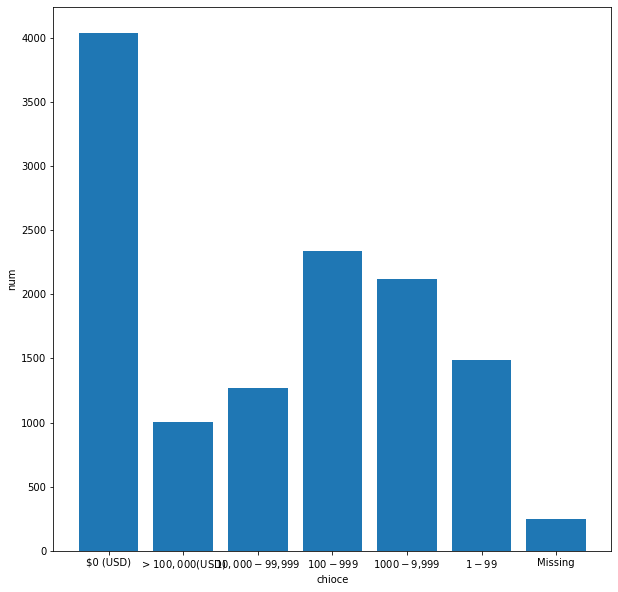

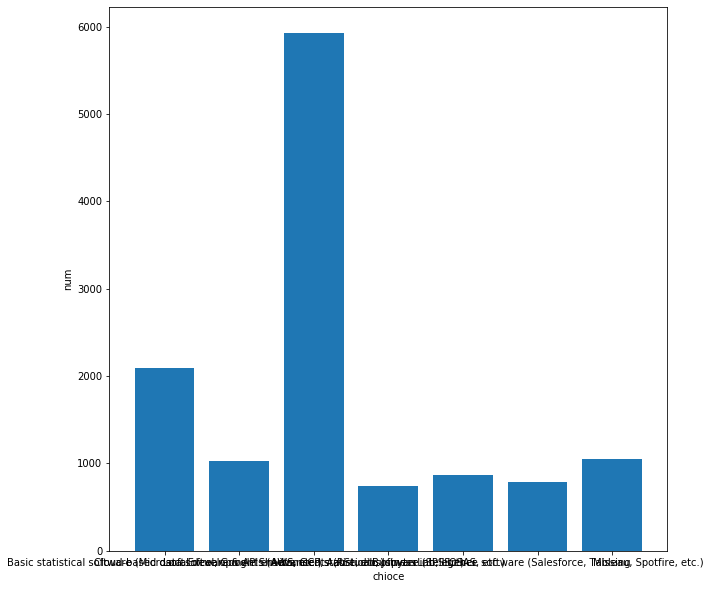

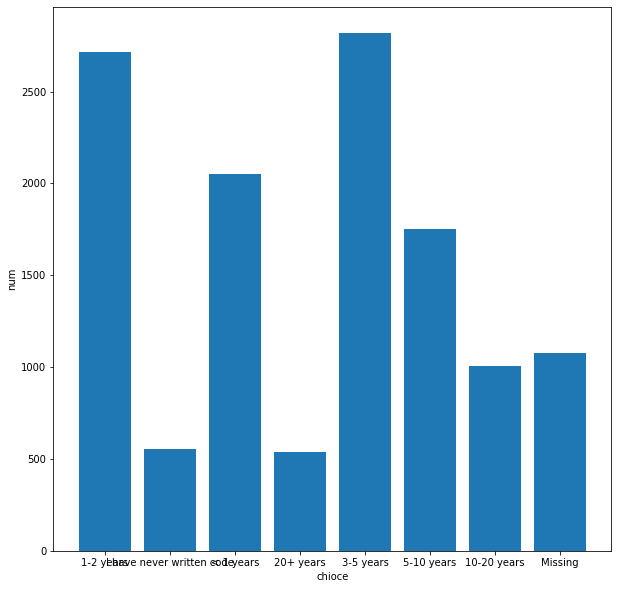

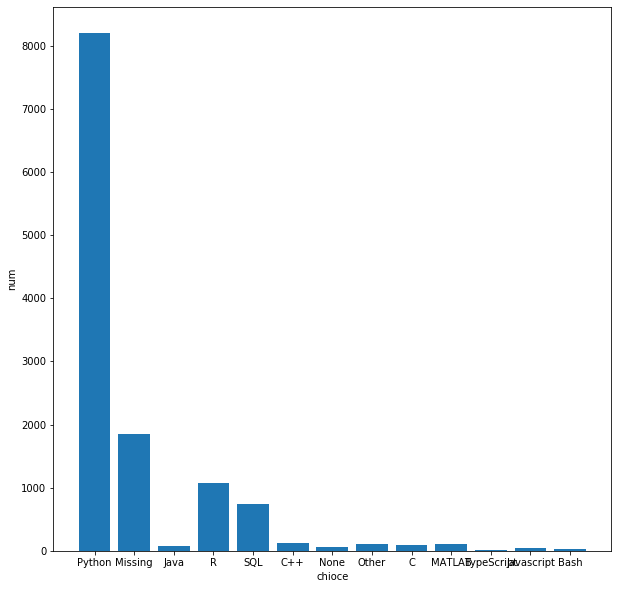

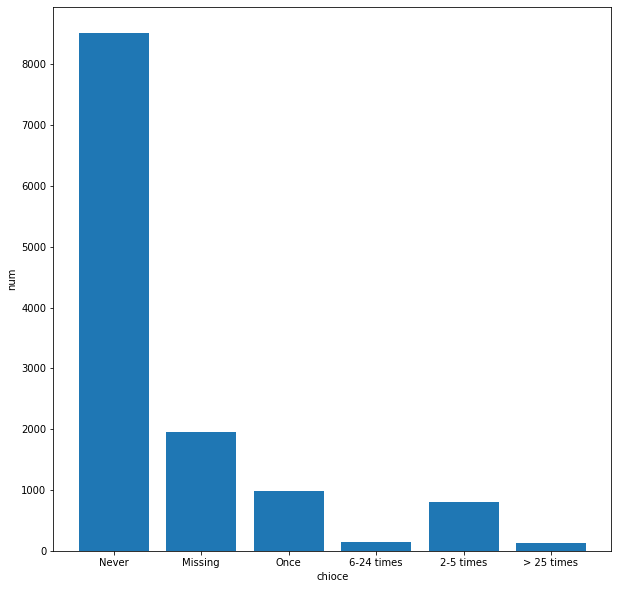

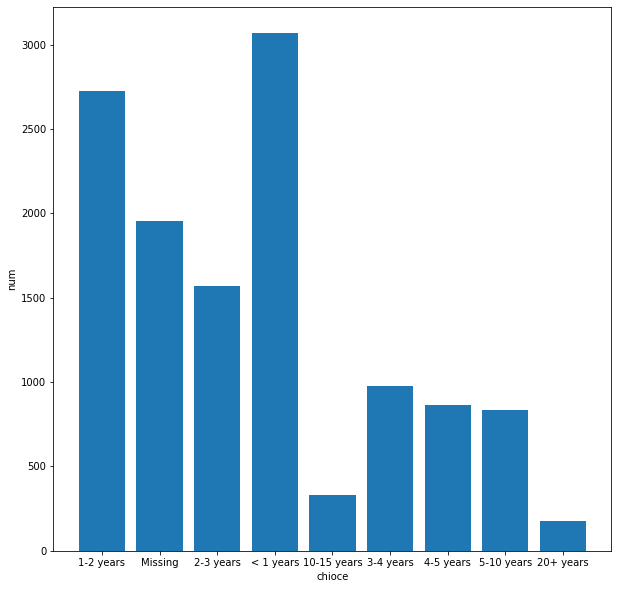

In [36]:
#plot them all to see the distribution

plt.figure(figsize=(10,10))
for i in range (0,6):
  plt.figure(figsize=(10,10))
  plt.bar(li1[li3[i]:li3[i+1]], li2[li3[i]:li3[i+1]])
  plt.xlabel('chioce')
  plt.ylabel('num')
  print(li1[li3[i]:li3[i+1]], li2[li3[i]:li3[i+1]])

###1.3.1 Q19

In [37]:
#first we start with the language used iin work 
#how many percentage of missing value and find the distribution of others regadless the missing value
name=li1[li3[3]:li3[4]]
number=li2[li3[3]:li3[4]]
print((number[1]/sum(number))*100,"%")
al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(1)
number.pop(1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")


  

14.75554132991918 %
Python 65.61574777946707 %
Missing 14.75554132991918 %
Java 0.5601344322637433 %
R 8.586060654557095 %
SQL 5.889413459230215 %
C++ 1.024245818996559 %
None 0.48811714811554774 %
Other 0.9042170120828998 %
C 0.672161318716492 %
MATLAB 0.9202208530047211 %
TypeScript 0.040009602304553096 %
Javascript 0.2960710570536929 %
Bash 0.2480595342882292 %
cleaning
Python 76.97362245376888 %
Java 0.6570918989955882 %
R 10.072280108889514 %
SQL 6.908851966582183 %
C++ 1.2015394724490753 %
None 0.5726086548390125 %
Other 1.0607340655214494 %
C 0.7885102787947058 %
MATLAB 1.0795081197784662 %
TypeScript 0.04693513564254201 %
Javascript 0.3473200037548108 %
Bash 0.29099784098376047 %


In this situation we can see that the python is dominating in the chioce. It tooks 76percent while R,SQL take morethan 5% the sum of the others is less than 10%. These ratio between python and others made it difficult to build a classification model to justify.We decide to use mode to repalce the missing value.
The effect that we use model to replace the missing value with mode will bring more noise into the model so that the model will become a little less accuracy 

In [0]:
#so fill the NA with value 
df2.loc[:,'Q19']=df2.loc[:,'Q19'].fillna("Python")


In [39]:
print(li3)

[0, 7, 14, 22, 35, 41, 50]


###Q15

In [40]:

name=li1[li3[2]:li3[3]]
number=li2[li3[2]:li3[3]]

al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(-1)
number.pop(-1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")

1-2 years 21.709210210450507 %
I have never written code 4.417060094422661 %
< 1 years 16.39593502440586 %
20+ years 4.297031287509003 %
3-5 years 22.54941185884612 %
5-10 years 13.995358886132673 %
10-20 years 8.033928142754261 %
Missing 8.602064495478915 %
cleaning
1-2 years 23.752407634389776 %
I have never written code 4.832778847837506 %
< 1 years 17.939064962353353 %
20+ years 4.701453335668009 %
3-5 years 24.671686219576255 %
5-10 years 15.312554718963403 %
10-20 years 8.790054281211697 %


In [0]:
dict3={'1-2 years':2, 'I have never written code':0, '< 1 years':1, '20+ years':6, '3-5 years':3, '5-10 years':4, '10-20 years':5}

after trying knn kmeans and even linear regression. all the predict model do not work well in the testing set. I think perhaps use a mode or mean to repalce the missing value is more practical, However, according to the printing information. the distribution of data is flat, which means the top3 class have even a same percentage in the data set. so choose the mean or median value is more resonable. after filling missing value with mode, there will be little noise in data and the mean will not cahnge (because in this columns mode and mean is same rank)

In [42]:

dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q15']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y=y.tolist()
for i in range(len(y)):
  y[i]=dict3[y[i]]

fillvalue=np.median(y)
#y=le.fit_transform(y)
#aclist1=[]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, shuffle=True)
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)
fillvalue


3.0

so we fill the missing value with "3-5 years" 

In [0]:
df2.loc[:,"Q15"]=df2.loc[:,"Q15"].fillna("3-5 years")

In [44]:
df2.loc[:,"Q15"].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years'], dtype=object)

###for Q14

In [45]:

name=li1[li3[1]:li3[2]]
number=li2[li3[1]:li3[2]]

al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(-1)
number.pop(-1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")

Basic statistical software (Microsoft Excel, Google Sheets, etc.) 16.756021445146835 %
Cloud-based data software & APIs (AWS, GCP, Azure, etc.) 8.265983836120668 %
Local development environments (RStudio, JupyterLab, etc.) 47.411378730895414 %
Advanced statistical software (SPSS, SAS, etc.) 5.937424981995679 %
Other 6.969672721453149 %
Business intelligence software (Salesforce, Tableau, Spotfire, etc.) 6.2975114027366565 %
Missing 8.362006881651595 %
cleaning
Basic statistical software (Microsoft Excel, Google Sheets, etc.) 18.285015717778556 %
Cloud-based data software & APIs (AWS, GCP, Azure, etc.) 9.02025847013622 %
Local development environments (RStudio, JupyterLab, etc.) 51.737687740132735 %
Advanced statistical software (SPSS, SAS, etc.) 6.47921760391198 %
Other 7.605658400279427 %
Business intelligence software (Salesforce, Tableau, Spotfire, etc.) 6.8721620677610895 %


In [0]:
dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q14']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y=y.tolist()
y=le.fit_transform(y)

aclist1=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#for i in range (1,51):
#  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
#  knn.fit(X_train,y_train)
#  accuracy=accuracy_score(y_test,knn.predict(X_test))
#  aclist1.append(accuracy)

#plt.plot(range(1,51),aclist1)

accuracy of 55% can be accepted. because if the accuract become 100%, that's means the feature has no need to exist because all the feature can be 100% sure predicted by other feature. and the reason why using knn instesd of simply replaced it by mode is the mode of the data only takes 55%. so it can cause a lot of niose if we use it. while this kind of catagorical feature don't have a mean or median. So at least in this situation, knn seems the best answer.   

In [47]:
knn=neighbors.KNeighborsClassifier(n_neighbors=44)
knn.fit(X,y)# after selecting the i number,we can use the value for whole already-known data 
Xpred=dfprepare1pre.iloc[:,:-1]
ypred=knn.predict(Xpred)
ypred=le.inverse_transform(ypred)
dfprepare1pre.iloc[:,-1]=ypred

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
print(dfprepare1trian.shape)
dfprepare1pre=dfprepare1pre.append(dfprepare1trian)
dfprepare1pre=dfprepare1pre.sort_index()
df2['Q14']=dfprepare1pre['tar']

(11452, 240)


###Q22

In [49]:
name=li1[li3[4]:li3[5]]
number=li2[li3[4]:li3[5]]

al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(1)
number.pop(1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")

Never 68.1123469632712 %
Missing 15.579739137392975 %
Once 7.809874369848764 %
6-24 times 1.1602784668320396 %
2-5 times 6.361526766423942 %
> 25 times 0.9762342962310955 %
cleaning
Never 80.6824644549763 %
Once 9.251184834123222 %
6-24 times 1.3744075829383886 %
2-5 times 7.535545023696683 %
> 25 times 1.1563981042654028 %


In [0]:
dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q22']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y=y.tolist()
y=le.fit_transform(y)

aclist1=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#for i in range (1,51):
#  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
#  knn.fit(X_train,y_train)
#  accuracy=accuracy_score(y_test,knn.predict(X_test))
#  aclist1.append(accuracy)

#plt.plot(range(1,51),aclist1)

the accuracy tends to 81% , however we need to be aware that even if this classification think every sample as "never", the accuaracy is still 80.5%, so perhaps it does not work well.
in this situation, we decide to use mode to repalce the missing value.because the "never" is domination in the dataset by having 80% percent in already-knownsample. even if we use median or mean, it will still be "never".

In [0]:
knn=neighbors.KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
ytestpred=knn.predict(X_test)

In [52]:
df_empty=pd.DataFrame(columns=['test', 'pred'])
df_empty['pred']=ytestpred
df_empty['test']=y_test

df_empty=df_empty.loc[df_empty['test']!=3]
y_test=df_empty['test']
ytestpred=df_empty['pred']
accuracy_score(y_test,ytestpred)

0.0029940119760479044

see? it works awful.

In [53]:
df2["Q22"]=df2['Q22'].fillna("Never")
df2['Q22'].unique()

array(['Never', 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

### Q23


In [54]:
name=li1[li3[5]:]
number=li2[li3[5]:]

al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(1)
number.pop(1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")

1-2 years 21.821237096903257 %
Missing 15.651756421541169 %
2-3 years 12.55501320316876 %
< 1 years 24.54989197407378 %
10-15 years 2.640633752100504 %
3-4 years 7.8018724493878535 %
4-5 years 6.905657357765864 %
5-10 years 6.665599743938546 %
20+ years 1.4083380011202689 %
cleaning
1-2 years 25.87041077696613 %
2-3 years 14.884735793567971 %
< 1 years 29.105397969832087 %
10-15 years 3.130632767289631 %
3-4 years 9.249596812446637 %
4-5 years 8.18707902476046 %
5-10 years 7.9024760459159475 %
20+ years 1.6696708092211365 %


In [0]:
dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q23']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y=y.tolist()
y=le.fit_transform(y)

aclist1=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#for i in range (1,51):
#  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
#  knn.fit(X_train,y_train)
#  accuracy=accuracy_score(y_test,knn.predict(X_test))
#  aclist1.append(accuracy)

#plt.plot(range(1,51),aclist1)

it doesn't work well, according to this condition, choosing from mean,mode, median is a better chioce.

In [56]:
dictq22={'1-2 years':2, '2-3 years':3, '< 1 years':1, '10-15 years':7,
       '3-4 years':4, '4-5 years':5, '5-10 years':6, '20+ years':8}
dfprepare1trian['tar']=dfprepare1trian['tar'].map(dictq22)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


we choose to fill nan with median, because two class both higher than 30 percent and if we just fill with mode we will change the mean and the std. If we fill with median, it will have a less effect on mean and std(because median is more close to mean in this case)

In [57]:
df2["Q23"]=df2['Q23'].fillna('1-2 years')
df2['Q23'].unique()

array(['1-2 years', '2-3 years', '< 1 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years'], dtype=object)

###Q11

We take a log to caculate the number , then we find mean and median is same. So we fill nan with mode. this will cause less effect on mean, but it will redue the std

In [58]:
name=li1[li3[0]:li3[1]]
number=li2[li3[0]:li3[1]]

al=sum(number)
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")
name.pop(-1)
number.pop(-1)
#for caculating the percentage of each chioce
al=sum(number)
print("cleaning")
for i in range(0,len(name)):
  per=number[i]/al
  per=per*100
  print(name[i],per,"%")


$0 (USD) 32.31175482115708 %
> $100,000 ($USD) 8.00992238137153 %
$10,000-$99,999 10.146435144434664 %
$100-$999 18.684484276226293 %
$1000-$9,999 16.988077138513244 %
$1-$99 11.882851884452268 %
Missing 1.9764743538449228 %
cleaning
$0 (USD) 32.963265306122445 %
> $100,000 ($USD) 8.17142857142857 %
$10,000-$99,999 10.351020408163265 %
$100-$999 19.06122448979592 %
$1000-$9,999 17.330612244897956 %
$1-$99 12.122448979591836 %


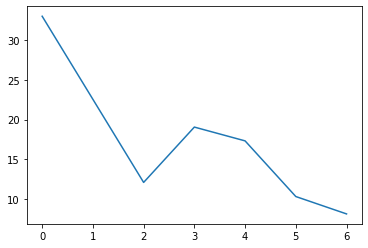

In [59]:
loglist=[0,2,3,4,5,6]
valuelist=[32.96,12.12,19.06,17.33,10.35,8.17]
plt.plot(loglist,valuelist)

In [0]:
dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q11']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y=y.tolist()
y=le.fit_transform(y)

aclist1=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#for i in range (1,21):
#  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
#  knn.fit(X_train,y_train)
#  accuracy=accuracy_score(y_test,knn.predict(X_test))
#  aclist1.append(accuracy)

#plt.plot(range(1,21),aclist1)

In [61]:
#i=5 has the best accuracy
dfprepare1=dfprepare.copy()

dfprepare1['tar']=df2['Q11']
dfprepare1pre=dfprepare1.loc[dfprepare1['tar'].isnull().values==True]
dfprepare1trian=dfprepare1.dropna()

X=dfprepare1trian.iloc[:,:-1]
y=dfprepare1trian['tar']
y.unique()
#y=y.tolist()


array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99'], dtype=object)

In [62]:
dictq11={'$0 (USD)':1, '> $100,000 ($USD)':6, '$10,000-$99,999':5, '$100-$999':3,'$1000-$9,999':4, '$1-$99':2}
y=y.map(dictq11)
print(y.mean())
print(y.median())
print(y.mode())

2.8449795918367347
3.0
0    1
dtype: int64


In [63]:
10**y.mean(),10**y.median()
# both of them can be consider as logy=3 ie. '$100-$999"

(699.8091101270512, 1000.0)

In [64]:
# so we fill nan with '$100-$999'
df2["Q11"]=df2['Q11'].fillna('$100-$999')
df2['Q11'].unique()

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99'], dtype=object)

###encoding

In [65]:
dfformissingvalue

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,510,1,Male,EU,Master’s degree,Software Engineer,3,0,I do not know,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"30,000-39,999"
1,423,5,Male,AS,Professional degree,Software Engineer,4,6,"We have well established ML methods (i.e., mod...",1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
2,391,5,Male,AS,Master’s degree,Other,4,6,I do not know,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,">250,000"
3,392,1,Male,AS,Bachelor’s degree,Other,0,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
4,470,7,Male,EU,Master’s degree,Data Scientist,0,2,"We have well established ML methods (i.e., mod...",0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,"60,000-69,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,346,1,Male,AS,Bachelor’s degree,Data Scientist,1,2,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12493,88,2,Prefer not to say,AS,No formal education past high school,Data Scientist,2,1,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12494,473,0,Male,AS,Bachelor’s degree,Other,2,2,I do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"
12495,176,2,Male,AS,Master’s degree,Statistician,1,5,"We recently started using ML methods (i.e., mo...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999"


In [0]:
dfprepare['Q11']=df2['Q11']
dfprepare['Q14']=df2['Q14']
dfprepare['Q15']=df2['Q15']
dfprepare['Q19']=df2['Q19']
dfprepare['Q22']=df2['Q22']
dfprepare['Q23']=df2['Q23']
dfprepare['Q3']=dfformissingvalue['Q3']

In [67]:
dfprepare

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,Time from Start to Finish (seconds),Q1,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q11,Q14,Q15,Q19,Q22,Q23,Q3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,510,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0 (USD),"Basic statistical software (Microsoft Excel, G...",1-2 years,Python,Never,1-2 years,EU
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,423,5,4,6,1,1,1,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,Python,Never,1-2 years,AS
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,391,5,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,"$10,000-$99,999","Local development environments (RStudio, Jupyt...",1-2 years,Python,Once,2-3 years,AS
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,392,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0 (USD),"Local development environments (RStudio, Jupyt...",< 1 years,Python,Never,< 1 years,AS
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,470,7,0,2,0,0,1,...,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,Java,Never,10-15 years,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,346,1,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$100-$999,"Local development environments (RStudio, Jupyt...",3-5 years,Python,Never,1-2 years,AS
12493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$100-$999,"Basic statistical software (Microsoft Excel, G...",3-5 years,Python,Never,1-2 years,AS
12494,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,473,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0 (USD),"Local development environments (RStudio, Jupyt...",1-2 years,Python,Never,1-2 years,AS
12495,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176,2,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$100-$999,"Basic statistical software (Microsoft Excel, G...",3-5 years,Python,Never,1-2 years,AS


In [68]:
#in these features,Q14 and Q19 need one-hot encoding while others need labels encode because the have numerical repationship
print(dfprepare['Q11'].unique())
print(dfprepare['Q14'].unique())
print(dfprepare['Q15'].unique())
print(dfprepare['Q19'].unique())
print(dfprepare['Q22'].unique())
print(dfprepare['Q23'].unique())


['$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99']
['Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
 'Local development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)' 'Other'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)']
['1-2 years' 'I have never written code' '< 1 years' '20+ years'
 '3-5 years' '5-10 years' '10-20 years']
['Python' 'Java' 'R' 'SQL' 'C++' 'None' 'Other' 'C' 'MATLAB' 'TypeScript'
 'Javascript' 'Bash']
['Never' 'Once' '6-24 times' '2-5 times' '> 25 times']
['1-2 years' '2-3 years' '< 1 years' '10-15 years' '3-4 years' '4-5 years'
 '5-10 years' '20+ years']


In [0]:
#we cannot use le.fit_transform directly so we can use the dict
dictq11={'$0 (USD)':1, '> $100,000 ($USD)':6, '$10,000-$99,999':5, '$100-$999':3,'$1000-$9,999':4, '$1-$99':2}
dictq15={'1-2 years':2, 'I have never written code':0, '< 1 years':1, '20+ years':6,'3-5 years':3, '5-10 years':4, '10-20 years':5}
dictq22={'Never':0, 'Once':1, '6-24 times':3, '2-5 times':2, '> 25 times':4}
dictq23={'1-2 years': 1, '10-15 years': 6, '2-3 years': 2, '20+ years': 7, '3-4 years': 3, '4-5 years': 4, '5-10 years': 5, '< 1 years': 0}

In [0]:
dfprepare['Q11']=dfprepare['Q11'].map(dictq11)
dfprepare['Q15']=dfprepare['Q15'].map(dictq15)
dfprepare['Q22']=dfprepare['Q22'].map(dictq22)
dfprepare['Q23']=dfprepare['Q23'].map(dictq23)
dfprepare['Q3']=dfformissingvalue['Q3']

In [71]:
#then onehot encoding the last 2 features
dfforenc=pd.DataFrame()
dfforenc['Q19']=dfprepare['Q19']
dfforenc['Q14']=dfprepare['Q14']
dfforenc['Q3']=dfprepare['Q3']
dfforenc


,Q19,Q14,Q3
0,Python,"Basic statistical software (Microsoft Excel, G...",EU
1,Python,"Cloud-based data software & APIs (AWS, GCP, Az...",AS
2,Python,"Local development environments (RStudio, Jupyt...",AS
3,Python,"Local development environments (RStudio, Jupyt...",AS
4,Java,"Advanced statistical software (SPSS, SAS, etc.)",EU
...,...,...,...
12492,Python,"Local development environments (RStudio, Jupyt...",AS
12493,Python,"Basic statistical software (Microsoft Excel, G...",AS
12494,Python,"Local development environments (RStudio, Jupyt...",AS
12495,Python,"Basic statistical software (Microsoft Excel, G...",AS


In [72]:
enc=OneHotEncoder()
dfforenc=enc.fit_transform(dfforenc).toarray()
dfforenc=pd.DataFrame(dfforenc)
dfforenc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
dfforenc.columns=['Q19-0','Q19-1','Q19-2','Q19-3','Q19-4','Q19-5','Q19-6','Q19-7','Q19-8','Q19-9','Q19-10','Q19-11','Q19-12','Q14-0','Q14-1','Q14-2','Q14-3','Q14-4','Q3-1','Q3-2','Q3-3','Q3-4','Q3-5','Q3-6']
dfforenc

,Q19-0,Q19-1,Q19-2,Q19-3,Q19-4,Q19-5,Q19-6,Q19-7,Q19-8,Q19-9,Q19-10,Q19-11,Q19-12,Q14-0,Q14-1,Q14-2,Q14-3,Q14-4,Q3-1,Q3-2,Q3-3,Q3-4,Q3-5,Q3-6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
for i in dfforenc.columns:
  dfprepare[i]=dfforenc[i]

In [75]:
dfprepare=dfprepare.drop(columns=['Q14','Q19','Q3'])
dfprepare=dfprepare.drop(columns=list(range(33)))#drop this and use new one 
dfprepare

,Time from Start to Finish (seconds),Q1,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,...,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q11,Q15,Q22,Q23,Q19-0,Q19-1,Q19-2,Q19-3,Q19-4,Q19-5,Q19-6,Q19-7,Q19-8,Q19-9,Q19-10,Q19-11,Q19-12,Q14-0,Q14-1,Q14-2,Q14-3,Q14-4,Q3-1,Q3-2,Q3-3,Q3-4,Q3-5,Q3-6
0,510,1,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,423,5,4,6,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,391,5,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,5,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,392,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,470,7,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0,0,0,5,6,0,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,346,1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12493,88,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12494,473,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12495,176,2,1,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#for Exploratory data analysis

###show some intersting feature

in this part, to show it clearly in the plot, we choose to use the data before one-hot encoding. and then clean all rows with missingvalue in Q11,Q15,Q14,Q19,Q22,Q23

In [76]:
dfformissingvalue


featurelist2
for i in featurelist2:
  dfformissingvalue[i]=df2.iloc[:,i]

dfformissingvalue=dfformissingvalue.rename(columns={18:'Q11',43:'Q14',44:'Q15',81:'Q19',99:'Q22',100:'Q23'})

dfformissingvalue

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,Q11,Q14,Q15,Q19,Q22,Q23
0,510,1,Male,EU,Master’s degree,Software Engineer,3,0,I do not know,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"30,000-39,999",$0 (USD),"Basic statistical software (Microsoft Excel, G...",1-2 years,Python,Never,1-2 years
1,423,5,Male,AS,Professional degree,Software Engineer,4,6,"We have well established ML methods (i.e., mod...",1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999","> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,Python,Never,1-2 years
2,391,5,Male,AS,Master’s degree,Other,4,6,I do not know,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,">250,000","$10,000-$99,999","Local development environments (RStudio, Jupyt...",1-2 years,Python,Once,2-3 years
3,392,1,Male,AS,Bachelor’s degree,Other,0,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999",$0 (USD),"Local development environments (RStudio, Jupyt...",< 1 years,Python,Never,< 1 years
4,470,7,Male,EU,Master’s degree,Data Scientist,0,2,"We have well established ML methods (i.e., mod...",0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,"60,000-69,999","$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,Java,Never,10-15 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,346,1,Male,AS,Bachelor’s degree,Data Scientist,1,2,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999",$100-$999,"Local development environments (RStudio, Jupyt...",3-5 years,Python,Never,1-2 years
12493,88,2,Prefer not to say,AS,No formal education past high school,Data Scientist,2,1,We use ML methods for generating insights (but...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999",$100-$999,"Basic statistical software (Microsoft Excel, G...",3-5 years,Python,Never,1-2 years
12494,473,0,Male,AS,Bachelor’s degree,Other,2,2,I do not know,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0-9,999",$0 (USD),"Local development environments (RStudio, Jupyt...",1-2 years,Python,Never,1-2 years
12495,176,2,Male,AS,Master’s degree,Statistician,1,5,"We recently started using ML methods (i.e., mo...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1

In [0]:
dfforexp=dfformissingvalue.copy()

In [0]:
# because do the one hot encoding will increase the difficulty for caculating, so in this step we can see the details about catagorical features that need us to do one hot encoding
# and we can decide to use the futures or not according to the result of this step

#the first feature we choose is Q4: education
table1=dfforexp.loc[:,['Q4','Q10_Encoded']]

In [0]:
table1=pd.pivot_table(table1,index=['Q4'],columns=['Q10_Encoded'],aggfunc=len)

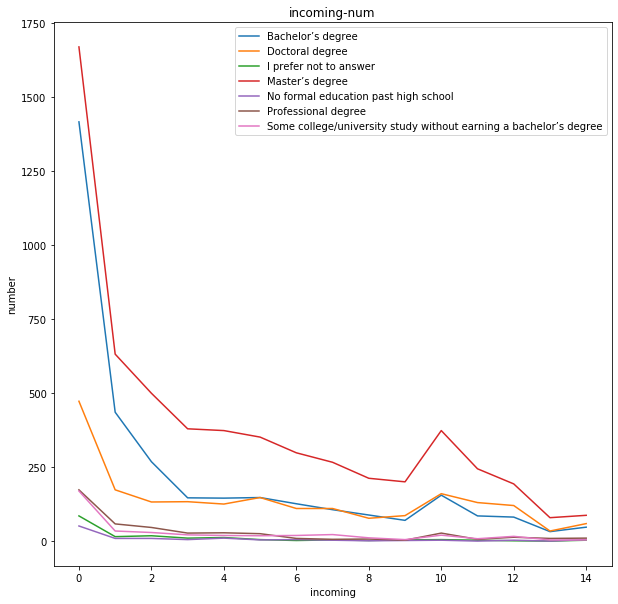

In [80]:
plt.figure(figsize=(10,10))
plt.plot(range(0,15),table1.iloc[0,:],label="Bachelor’s degree")
plt.plot(range(0,15),table1.iloc[1,:],label="Doctoral degree")
plt.plot(range(0,15),table1.iloc[2,:],label="I prefer not to answer")
plt.plot(range(0,15),table1.iloc[3,:],label="Master’s degree")
plt.plot(range(0,15),table1.iloc[4,:],label="No formal education past high school")
plt.plot(range(0,15),table1.iloc[5,:],label="Professional degree")
plt.plot(range(0,15),table1.iloc[6,:],label="Some college/university study without earning a bachelor’s degree")

plt.xlabel('incoming')
plt.ylabel('number')
plt.title("incoming-num")
plt.legend()
plt.show()


in the above fig we can see that different education degree has different numbers of samples. So we have to change it into percentage.

In [81]:
# like the same trend with different sample size. so we try to  use percentage to plot data and plot again.
table1new=table1.copy()
for i in range(7):
  summ=np.sum(table1.iloc[i,:])
  table1new.iloc[i,:]=(table1new.iloc[i,:])*100/summ

table1new

Q10_Encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Q4,,,,,,,,,,,,,,,
Bachelor’s degree,42.130318,12.972330,8.003570,4.373698,4.343945,4.403451,3.778637,3.183576,2.648021,2.112467,4.641476,2.558762,2.439750,0.981851,1.428146
Doctoral degree,22.707633,8.353337,6.385022,6.433029,6.048968,7.105137,5.328853,5.328853,3.744599,4.176668,7.729237,6.289006,5.808929,1.680269,2.880461
I prefer not to answer,46.739130,8.695652,10.326087,5.978261,7.065217,3.260870,1.630435,2.717391,1.630435,2.717391,3.260870,2.173913,1.086957,0.543478,2.173913
Master’s degree,28.442399,10.770279,8.520791,6.475801,6.373551,5.998637,5.095433,4.550102,3.629857,3.425358,6.373551,4.175187,3.306067,1.363327,1.499659
No formal education past high school,41.600000,8.000000,8.000000,4.800000,8.800000,4.000000,4.800000,3.200000,1.600000,2.400000,3.200000,0.800000,3.200000,0.800000,4.800000
Professional degree,37.662338,12.770563,10.173160,6.060606,6.277056,5.627706,2.164502,1.515152,1.731602,0.865801,6.060606,1.515152,3.030303,2.164502,2.380952
Some college/university study without earning a bachelor’s degree,41.062802,8.454106,7.246377,5.314010,4.830918,4.589372,4.830918,5.555556,2.898551,1.449275,5.072464,2.173913,4.106280,1.207729,1.207729


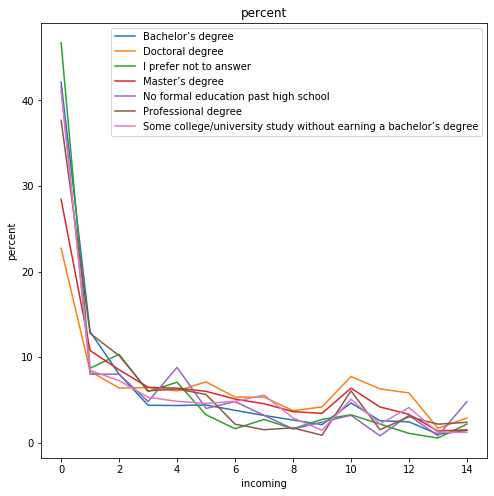

In [82]:
plt.figure(figsize=(8,8))
plt.plot(range(0,15),table1new.iloc[0,:],label="Bachelor’s degree")
plt.plot(range(0,15),table1new.iloc[1,:],label="Doctoral degree")
plt.plot(range(0,15),table1new.iloc[2,:],label="I prefer not to answer")
plt.plot(range(0,15),table1new.iloc[3,:],label="Master’s degree")
plt.plot(range(0,15),table1new.iloc[4,:],label="No formal education past high school")
plt.plot(range(0,15),table1new.iloc[5,:],label="Professional degree")
plt.plot(range(0,15),table1new.iloc[6,:],label="Some college/university study without earning a bachelor’s degree")

plt.xlabel('incoming')
plt.ylabel('percent')
plt.title("percent")
plt.legend()
plt.show()

seems that the distribution changes little with education, the rank0 is always the main part while every line have two peaks at 4 and 10. what should be point out that the distribution does not change to much but it still matters due to the bachelor has more than 40% in rank0 while phd only has 20% in rank0. We take a closer look by using box fig

Text(0, 0.5, 'incoming')

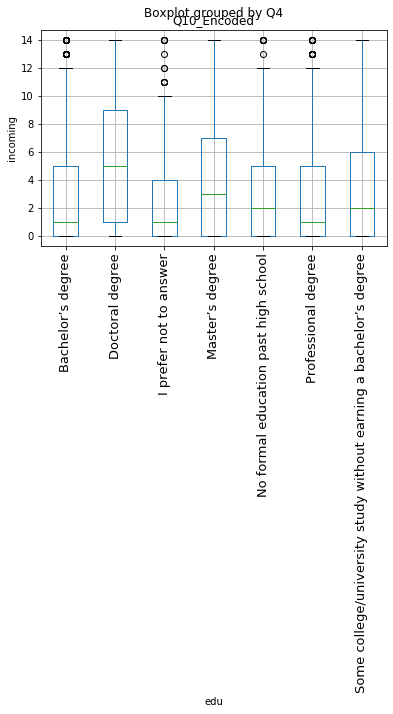

In [83]:
dfforexp.boxplot(column=['Q10_Encoded'],by=['Q4'])
plt.xticks(size='small',rotation=90,fontsize=13)
plt.xlabel('edu')
plt.ylabel('incoming')

so it does matter.

at least from the weight-sum we can see that the degree some how matters, especially for the MS and PHD students.

the distribution about gender

In [0]:
table2=dfforexp.loc[:,['Q2','Q10_Encoded']]
table2=pd.pivot_table(table2,index=['Q2'],columns=['Q10_Encoded'],aggfunc=len)
table2=table2.fillna(value=0)

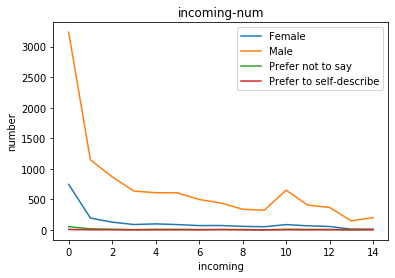

In [85]:
plt.plot(range(0,15),table2.iloc[0,:],label="Female")
plt.plot(range(0,15),table2.iloc[1,:],label="Male")
plt.plot(range(0,15),table2.iloc[2,:],label="Prefer not to say")
plt.plot(range(0,15),table2.iloc[3,:],label="Prefer to self-describe")

plt.xlabel('incoming')
plt.ylabel('number')
plt.title("incoming-num")
plt.legend()
plt.show()
#seems have a smae trend, but still have a problem of sample size, so we take a look at the percentage each rank take. 

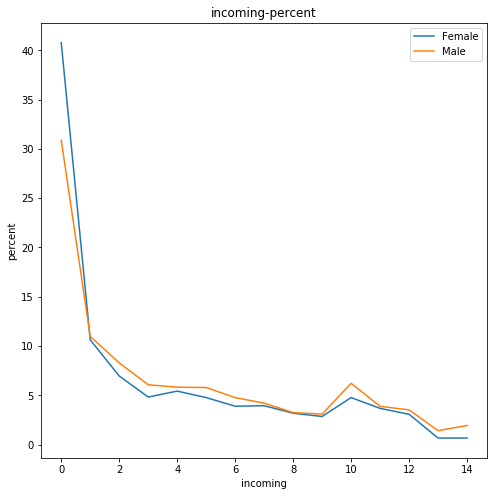

In [86]:

for i in range(4):
  summ=np.sum(table2.iloc[i,:])
  table2.iloc[i,:]=(table2.iloc[i,:])*100/summ


plt.figure(figsize=(8,8))
plt.plot(range(0,15),table2.iloc[0,:],label="Female")
plt.plot(range(0,15),table2.iloc[1,:],label="Male")
#plt.plot(range(0,15),table2.iloc[2,:],label="Prefer not to say")
#plt.plot(range(0,15),table2.iloc[3,:],label="Prefer to self-describe")
# the last two lines contain too less sample which will make a lot of disturbance， so we don't plot it 
plt.xlabel('incoming')
plt.ylabel('percent')
plt.title("incoming-percent")
plt.legend()
plt.show()

the reason why we do not plot the rest two gender is because that the sample size of them is too small to reprensent trends. we only can take a look at male and female 

Text(0, 0.5, 'incoming')

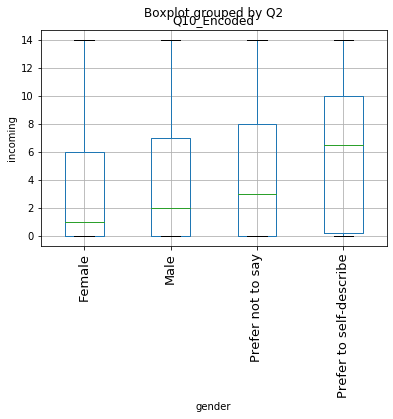

In [87]:
dfforexp.boxplot(column=['Q10_Encoded'],by=['Q2'])
plt.xticks(size='small',rotation=90,fontsize=13)
plt.xlabel('gender')
plt.ylabel('incoming')

the salary between female and male is not so much but still exit.
women whose salary is in rank 0 is much more than men while other rank is just a few less than men.

In [88]:
# next use ML  method or not 
table3=dfforexp.loc[:,['Q8','Q10_Encoded']]
table3=pd.pivot_table(table3,index=['Q8'],columns=['Q10_Encoded'],aggfunc=len)
#table2=table2.fillna(value=0)
table3

Q10_Encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Q8,,,,,,,,,,,,,,,
I do not know,550,108,83,53,60,46,41,35,28,24,33,21,12,6,17
No (we do not use ML methods),1021,319,195,125,122,134,84,75,51,39,84,37,27,13,19
We are exploring ML methods (and may one day put a model into production),956,308,217,136,145,164,127,115,73,78,145,79,62,10,21
"We have well established ML methods (i.e., models in production for more than 2 years)",399,189,195,138,134,126,113,107,103,105,212,194,175,73,99
"We recently started using ML methods (i.e., models in production for less than 2 years)",690,295,194,164,174,161,135,123,91,85,190,95,116,42,34
We use ML methods for generating insights (but do not put working models into production),424,143,124,112,84,73,76,69,59,46,86,57,42,21,32


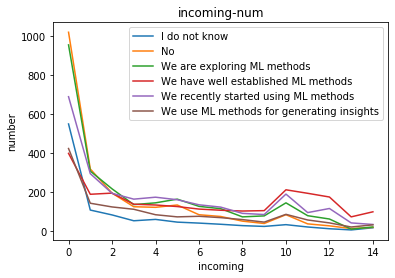

In [89]:
plt.plot(range(0,15),table3.iloc[0,:],label="I do not know")
plt.plot(range(0,15),table3.iloc[1,:],label="No")
plt.plot(range(0,15),table3.iloc[2,:],label="We are exploring ML methods")
plt.plot(range(0,15),table3.iloc[3,:],label="We have well established ML methods")
plt.plot(range(0,15),table3.iloc[4,:],label="We recently started using ML methods")
plt.plot(range(0,15),table3.iloc[5,:],label="We use ML methods for generating insights")
plt.xlabel('incoming')
plt.ylabel('number')
plt.title("incoming-num")
plt.legend()
plt.show()

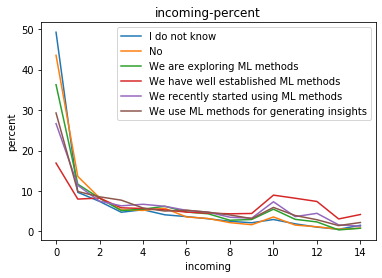

In [90]:
#like we did before, see the percentage of each rank 
for i in range(6):
  summ=np.sum(table3.iloc[i,:])
  table3.iloc[i,:]=(table3.iloc[i,:])*100/summ

plt.plot(range(0,15),table3.iloc[0,:],label="I do not know")
plt.plot(range(0,15),table3.iloc[1,:],label="No")
plt.plot(range(0,15),table3.iloc[2,:],label="We are exploring ML methods")
plt.plot(range(0,15),table3.iloc[3,:],label="We have well established ML methods")
plt.plot(range(0,15),table3.iloc[4,:],label="We recently started using ML methods")
plt.plot(range(0,15),table3.iloc[5,:],label="We use ML methods for generating insights")
plt.xlabel('incoming')
plt.ylabel('percent')
plt.title("incoming-percent")
plt.legend()
plt.show()

Text(0, 0.5, 'incoming')

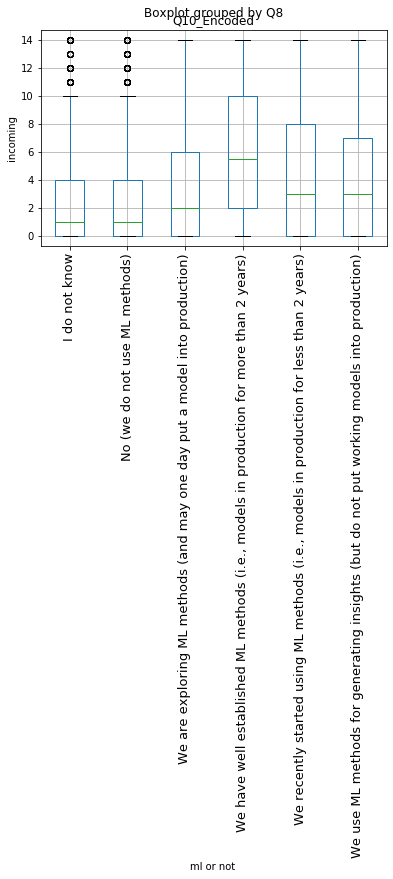

In [91]:
dfforexp.boxplot(column=['Q10_Encoded'],by=['Q8'])
plt.xticks(size='small',rotation=90,fontsize=13)
plt.xlabel('ml or not ')
plt.ylabel('incoming')

seems that more times spend with ml more monet they get while the first 3 class seems not too much diffrence. so this varaiable needs to be take considered.

###show the relationship between features and targets and the relationship between each featrue

In [0]:

#Q2 Q5 Q14 Q19 Q3
#here we still give Q4 and Q8 a rank
dfforexp['Q4'].unique()
dictq4={'Master’s degree':3, 'Bachelor’s degree':2, 'Doctoral degree':4,
       'Some college/university study without earning a bachelor’s degree':0,
       'I prefer not to answer':0, 'Professional degree':1,
       'No formal education past high school':0}

dictq8={'I do not know':0, 'No (we do not use ML methods)':0,'We have well established ML methods (i.e., models in production for more than 2 years)':4,'We are exploring ML methods (and may one day put a model into production)':2,'We recently started using ML methods (i.e., models in production for less than 2 years)':3,'We use ML methods for generating insights (but do not put working models into production)':1}
dfforexp['Q4']=dfforexp['Q4'].map(dictq4)
dfforexp['Q8']=dfforexp['Q8'].map(dictq8)
dfforexp['Q11']=dfforexp['Q11'].map(dictq11)
dfforexp['Q15']=dfforexp['Q15'].map(dictq15)
dfforexp['Q22']=dfforexp['Q22'].map(dictq22)
dfforexp['Q23']=dfforexp['Q23'].map(dictq23)

In [0]:
dfforexpsub=dfforexp.loc[:,['Q2','Q5','Q14','Q19','Q3']]
dfforexp=dfforexp.drop(columns=['Q2','Q5','Q14','Q19','Q3'])

In [94]:
for i in dfforexpsub.columns:
  print(i)
  print(len(dfforexpsub[i].unique()))

Q2
4
Q5
10
Q14
6
Q19
12
Q3
6


In [95]:
enc=OneHotEncoder()
dfforenc=enc.fit_transform(dfforexpsub).toarray()
dfforenc=pd.DataFrame(dfforenc)
dfforenc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12493,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12494,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
dfforenc.columns=['Q2-1','Q2-2','Q2-3','Q2-4','Q5-1','Q5-2','Q5-3','Q5-4','Q5-5','Q5-6','Q5-7','Q5-8','Q5-9','Q5-10','Q14-1','Q14-2','Q14-3','Q14-4','Q14-5','Q14-6','Q19-1','Q19-2','Q19-3','Q19-4','Q19-5','Q19-6','Q19-7','Q19-8','Q19-9','Q19-10','Q19-11','Q19-12','Q3-1','Q3-2','Q3-3','Q3-4','Q3-5','Q3-6']
for i in dfforenc.columns:
  dfforexp[i]=dfforenc[i]

In [0]:
y=dfforexp['Q10_Encoded']
dfforexp=dfforexp.drop(columns=['Q10_Encoded','Q10_buckets'])


#pccs = np.corrcoef(x, y)

In [0]:
dfforexp1=scaler.fit_transform(dfforexp)
dfforexp1=pd.DataFrame(dfforexp1)
dfforexp1.columns=dfforexp.columns
namelist=[]
valuelist=[]
for i in dfforexp1.columns:
  namelist.append(i)
  x=dfforexp1[i]
  pccs=np.corrcoef(x, y)
  valuelist.append(pccs)

In [0]:
valuelist2=[]
for i in valuelist:
  a=np.sum(i)
  a=(a-2)/2
  valuelist2.append(a)



In [0]:
dfforrank=pd.DataFrame()
dfforrank['name']=namelist
dfforrank['importance']=valuelist2
dfforrank['importance']=abs(dfforrank['importance'])
dfforrank=dfforrank.sort_values(by=['importance'])

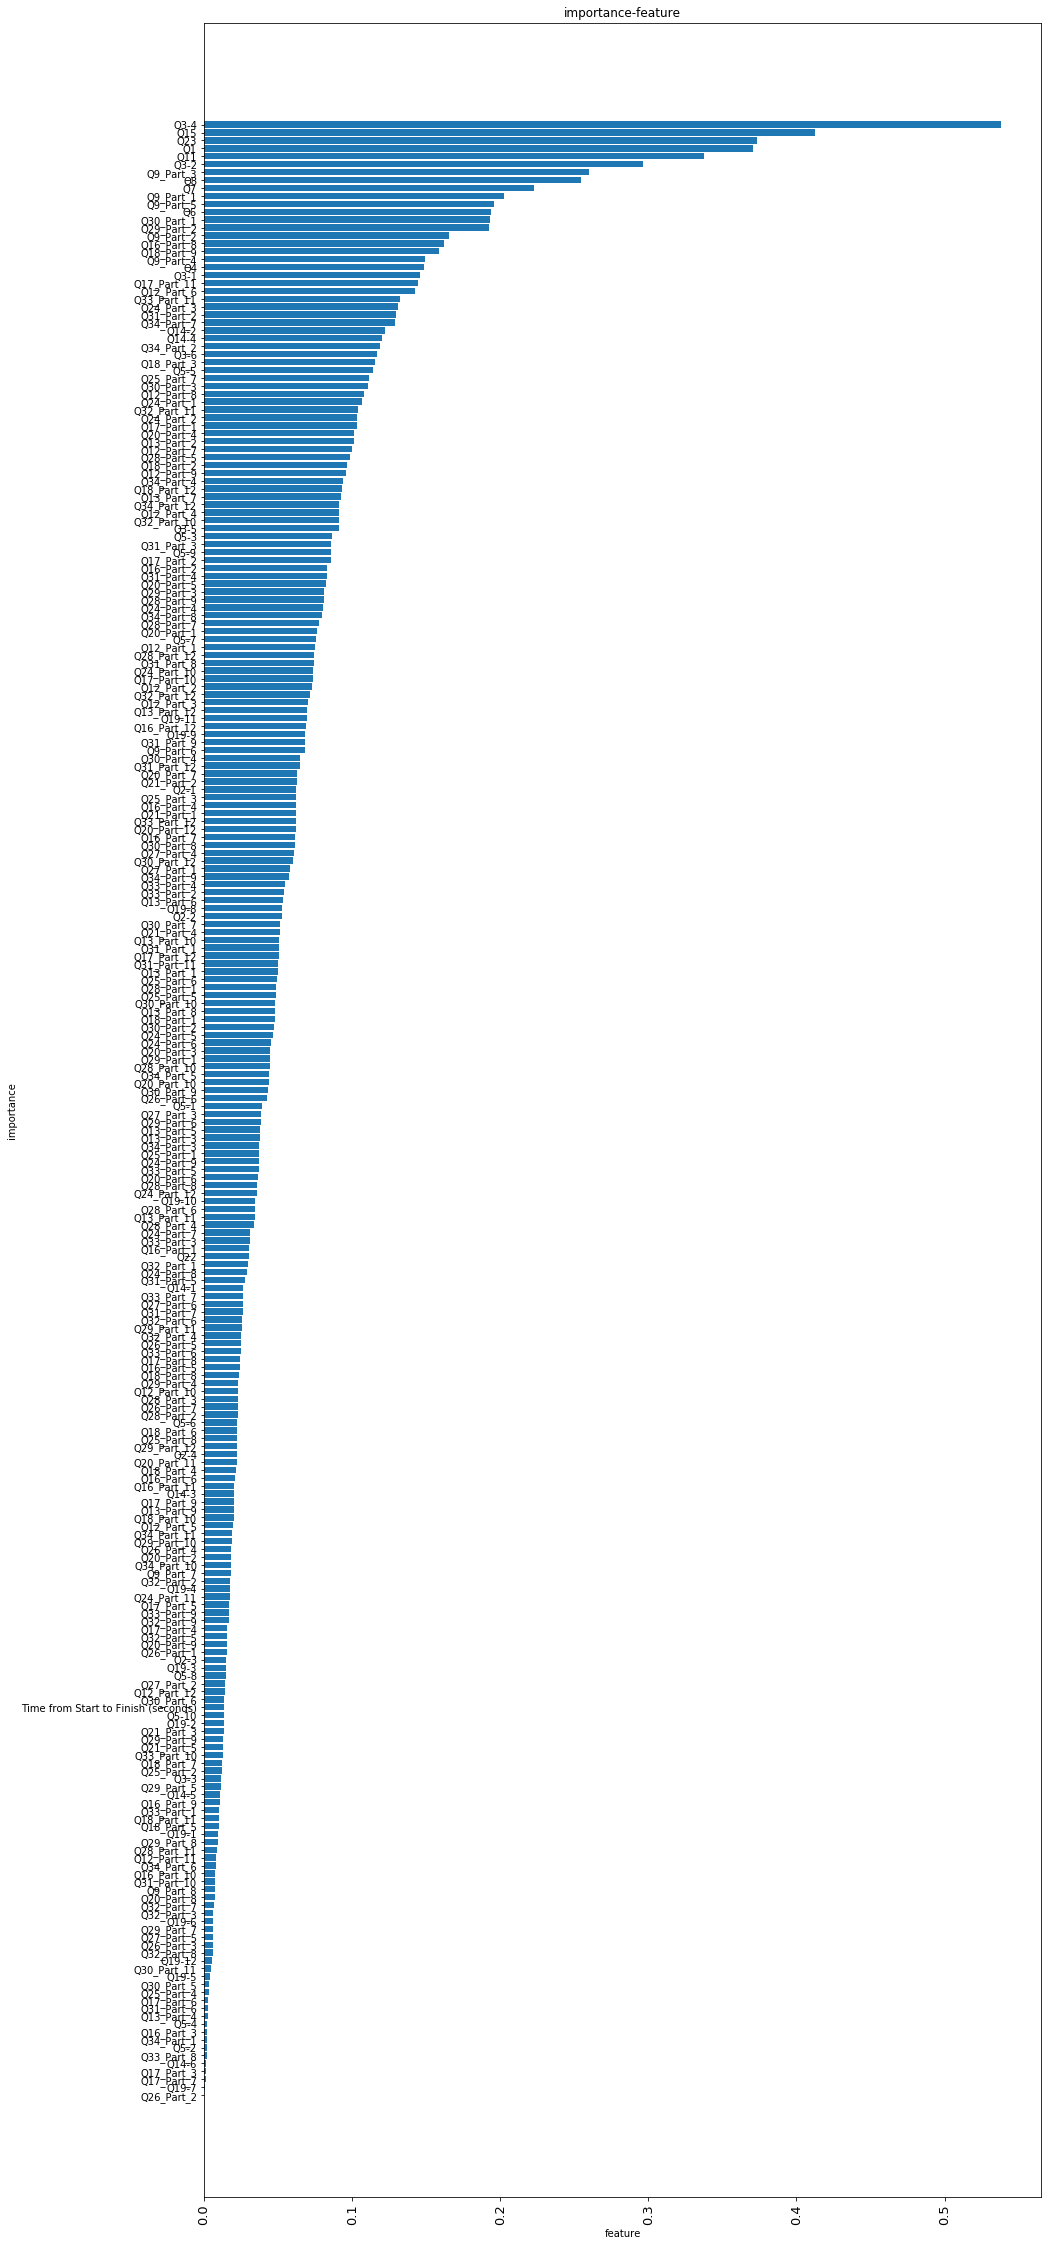

In [101]:
plt.figure(figsize=(15,40))
plt.barh(dfforrank['name'],dfforrank['importance'])
plt.xticks(size='small',rotation=90,fontsize=13)
plt.xlabel('feature')
plt.ylabel('importance')
plt.title("importance-feature")

plt.show()

After checking the one-hot Encoding we found that most important feature is the country that the people live in which means if you live in NA(like usa and canada) the income has a high probability to be higher than people in other place. As shown in the Pearson correlation coefficient. The Q3-4:”Which country you live in USA” , the Q15:” How long have you been writing code to analyze data (at work or at school)?”  and the Q23” For how many years have you used machine learning methods?” are the top 3 importanct feature. 


we take the top 20 features that have a great relationship with Y to make a heat map in order to identify there is a relationship between each feature or not.

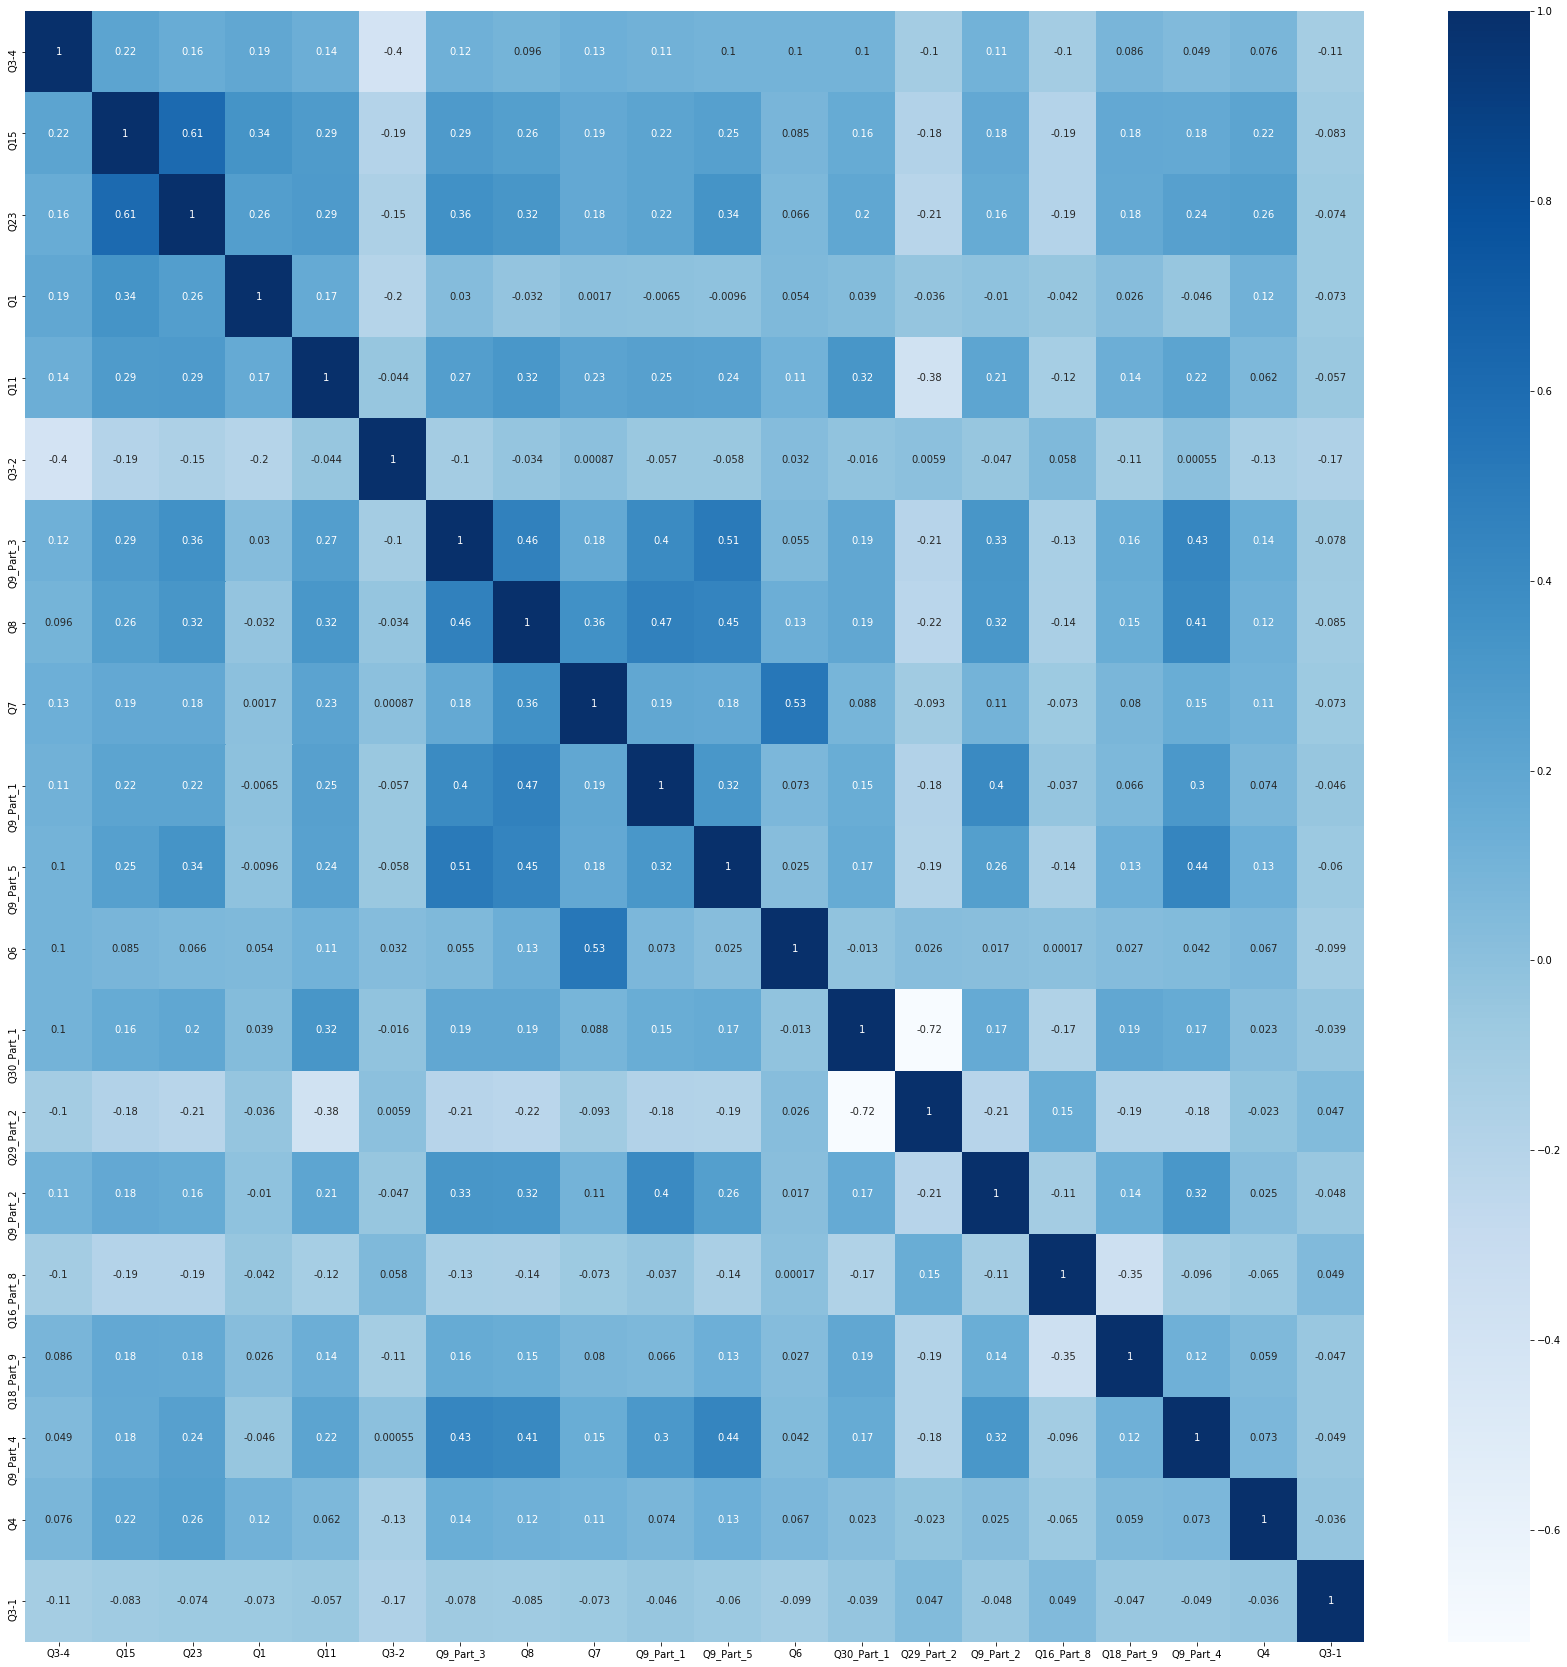

In [102]:
import seaborn as sns
dfforexpheat=dfforexp.copy()
dfforexpheat['Q10 encoding']=y

corr = dfforexpheat.corr()
corr['Q10RANK']=abs(corr['Q10 encoding'])
corr=corr.sort_values(by=['Q10RANK'],ascending=False)
corrlist=corr.iloc[1:21,:].index
corr = dfforexpheat.corr()

plt.subplots(figsize=(30,30))
sns.heatmap(corr.loc[corrlist,corrlist], cmap='Blues', annot=True)

as we can see above, there is some relationship between different feature which means they are not linear independece. So we need to use pca to remove this kind of relationship between them.

# lasso & PCA

the reason why we need to do feature selection is that in a model, when presented data with very high dimensionality, models usually choke because
Training time increases exponentially with number of features.
Models have increasing risk of overfitting with increasing number of features.

In other word, less feature means less possible to be overfiting, and as shown in last step, there exists relationship between different feature. if all the feature is input without selection, some real attributes behind feature will have more weigh and it will lead to error. Do feature selection can reduce the effect of them. 
  Also feature selection can remove useless feature, for example like the use student ID to predict gender-- which is exactly use less.

The method we choose here is L1-regularized linear regression. The reason why we choose this method is that this method can reduce the weigh of features to 0. Which means it can represent the imortance of the featrue.

The process we do is first choosing the right lamb in the training_test set. After get the best lambda with smallest MSE, we use the lambda to train the model and find out which features' weight is 0, then drop them..
So how we justify shall we drop the feature or not is the weight of the feature is 0 or not 

In [0]:
X_std=dfforexp
n, m = X_std.shape

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=1/3, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [0]:
from sklearn.linear_model import Lasso
lamblist=[0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]
y_test=np.array(y_test)
diflist=[]
for i in lamblist:
  lasso_reg = Lasso(alpha=i,max_iter=1000)
  lasso_reg.fit(X_train, y_train)
  ypred=lasso_reg.predict(X_test)
  dif=ypred-y_test
  dif=np.dot(dif,dif.T)/len(dif)
  diflist.append(dif)

Text(0, 0.5, 'MSE')

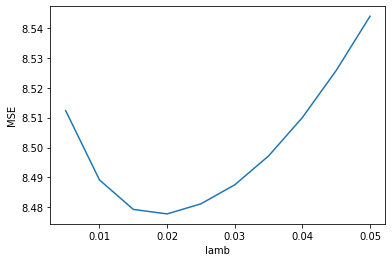

In [106]:
plt.plot(lamblist,diflist)
plt.xlabel('lamb')
plt.ylabel('MSE')

In [0]:
# so here we choose is lamb=0.02

In [108]:
from sklearn.linear_model import Lasso
 
lamb = 0.02
lasso_reg = Lasso(alpha=lamb)
lasso_reg.fit(X_train, y_train)
#print(lasso_reg.intercept_, lasso_reg.coef_)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
a=lasso_reg.coef_.tolist()
ilist=[]
for i in range(len(a)):
  if a[i]==0:
    ilist.append(i)

In [110]:
len(ilist)

106

In [111]:
dfforexp.iloc[:,ilist].columns

Index(['Time from Start to Finish (seconds)', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_8', 'Q12_Part_3', 'Q12_Part_12', 'Q13_Part_1', 'Q13_Part_10',
       'Q16_Part_1', 'Q16_Part_3',
       ...
       'Q14-2', 'Q14-6', 'Q19-2', 'Q19-3', 'Q19-6', 'Q19-7', 'Q19-8', 'Q19-9',
       'Q3-2', 'Q3-5'],
      dtype='object', length=106)

In [112]:
#so drop the columns that we do not need 
for i in dfforexp.iloc[:,ilist].columns:
  dfforexp=dfforexp.drop([i], axis=1)

dfforexp

,Q1,Q4,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_6,Q9_Part_7,Q12_Part_1,Q12_Part_2,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_11,Q13_Part_12,Q16_Part_2,Q16_Part_4,Q16_Part_5,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q17_Part_1,Q17_Part_2,Q17_Part_6,...,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q34_Part_1,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_11,Q11,Q15,Q22,Q23,Q2-1,Q2-4,Q5-3,Q5-4,Q5-5,Q5-6,Q5-7,Q5-8,Q5-10,Q14-3,Q14-4,Q14-5,Q19-1,Q19-4,Q19-5,Q19-10,Q19-11,Q19-12,Q3-1,Q3-3,Q3-4,Q3-6
0,1,3,3,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,1,4,6,4,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,3,4,6,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,5,2,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,3,0,2,4,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,0,0,0,0,0,1,0,5,6,0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,1,2,1,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12493,2,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12494,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,2,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12495,2,3,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
dfforexp.shape

(12497, 144)

we still do pca here because we want to remove the effect the the realtionship between different features causes. So we do pca and creat new PC to reduce the influence of it.Take Q23 and Q15  as an example, these features are both the question about writing code. So they definitely have relationship. To remove this unnecessary redundant data relationships. We choose to use PCA to deal with the whole data in order to remove the them.


In [0]:
#we still can do PCA
X=dfforexp

X_std=scaler.fit_transform(X)


In [115]:
C=np.cov(X_std.T)
eigenValues,eigenVectors = np.linalg.eig(C) 
#eigenVectors,eigenValues
#and sort them 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
print(eigenValues)
eigenVectors = eigenVectors[:, args]

[9.44839611 4.66849016 3.56716765 3.18888406 2.73426568 2.54368555
 2.24916657 2.11501321 1.90900037 1.83807501 1.71735552 1.64488389
 1.62954005 1.58441615 1.46523886 1.45987958 1.42944547 1.37437192
 1.36597624 1.31458237 1.30616444 1.25278145 1.23675141 1.23070338
 1.21603037 1.18271663 1.16766936 1.15871657 1.1367593  1.12930439
 1.11433248 1.10406386 1.09345766 1.09097632 1.07361817 1.06325688
 1.04792913 1.04413323 1.03445524 1.03059972 1.02396365 1.01851725
 0.99479481 0.99272777 0.99023108 0.98620887 0.97696333 0.96855682
 0.96457149 0.9565847  0.95420809 0.94539855 0.93376354 0.93098001
 0.92456093 0.9199902  0.91342001 0.91065642 0.90619261 0.89745128
 0.89196405 0.88626467 0.88072837 0.87842207 0.87104566 0.86854338
 0.86231808 0.85553618 0.84679309 0.83985803 0.83066581 0.82669867
 0.82227334 0.81709603 0.8136773  0.8058894  0.80226989 0.79683075
 0.7879271  0.7844618  0.77966241 0.77156425 0.76539399 0.76212702
 0.75669681 0.75352043 0.74304978 0.73724007 0.73430555 0.7274

In [116]:
a=0
for i in range(0,144):
  a=a+eigenValues[i]
  print(a/sum(eigenValues))

0.06560861149054456
0.09802608778763496
0.12279610312625441
0.14493935927608248
0.16392579596430468
0.18158886548661976
0.19720682797074995
0.21189324438634713
0.2251491306122749
0.23791251901702537
0.24983764468267503
0.26125953540602687
0.272574880268377
0.28357688974265066
0.29375134541053527
0.303888586818957
0.31381449716416215
0.32335798285398293
0.3328431698826218
0.3419714835900192
0.35104134414534927
0.3597405191742627
0.36832838341593244
0.37687425077815023
0.38531823040512975
0.39353088308184003
0.4016390492134129
0.4096850482070131
0.4175785783488708
0.4254203424337664
0.43315814323953955
0.4408246398344514
0.4484174881962838
0.45599310641064345
0.4634481915457578
0.47083132903988534
0.47810803231750376
0.48535837728467596
0.49254151940115987
0.49969788922335007
0.5068081789114424
0.5138806494043509
0.5207883939072037
0.5276817850984237
0.5345578395381966
0.5414059642262632
0.5481898889211161
0.5549154397400881
0.5616133168659534
0.5682557345937033
0.5748816494042687
0.5814

In [0]:
W=eigenVectors[:,:-18]
proj=np.dot(X_std, W)


In [118]:
proj.shape

(12497, 126)

# model build

The principle we used in build the model is that build 14 Classifiers and transform y into 14 forms like y0={0:0, 1-14:1} y1={0-1:0, 2-14:1} y2={0-2:0, 3-14:1} y3={0-3:0, 4-14:1}, as the function we define below. Then we use each y and X_train to train the model. After doing that we get 14 different model. Then we use these models to predict the X_train and return probability of samples in 0 or 1. And then use the probability that sample in rank 0-13 minus the probability that the sample I rank 0-12 to get the probability the sample in rank 13. And then rank12... Finally we get the probability of belonging to each rank. Then we choose the largest probability and class the sample into this rank. 

In [0]:
#y.unique() 
X=pd.DataFrame(data=proj)
X['target']=y

In [120]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,target
0,-1.721889,-0.542355,-0.337737,1.639615,-0.301435,0.715522,0.855836,3.045064,1.147463,-0.695752,-0.232983,-0.335917,-0.707921,-0.696932,0.550896,-1.289909,-0.938158,0.504545,0.463322,0.799626,-0.636295,0.045916,-0.046331,-0.137760,-0.355603,0.860266,0.206225,-0.088586,0.211645,-0.697269,-0.863458,0.207388,0.797757,-0.549021,0.136210,0.247480,0.374707,0.351128,-1.137621,0.760091,...,-1.539266,-0.020040,-0.424267,-0.802497,-0.256464,-1.382554,-0.337867,-0.328311,-0.312426,-0.436441,1.530862,-0.071746,0.136927,-0.435482,0.327782,0.414494,-1.063538,-0.235469,-0.058936,-0.487632,0.357258,-0.092611,0.067032,-0.200952,0.702459,0.608820,-0.214471,0.116329,0.669043,0.022466,-0.234474,-0.266631,0.388413,-0.323702,0.184327,-1.194920,0.521985,0.521127,-0.072740,3
1,-1.039190,-0.476126,-0.149438,0.151929,3.465167,-1.090406,-0.289890,-1.654528,-2.552143,-1.498426,-0.282837,1.277961,-0.949397,-1.175837,0.225906,-0.130173,-0.055078,-1.008453,0.291935,1.759046,0.418638,-0.265007,0.168670,0.366355,0.323807,-0.394074,-0.667505,0.607150,-0.234529,-1.060523,-0.335834,0.692788,-0.082777,-0.299240,0.500986,1.084742,-0.180776,0.588463,0.251041,0.526339,...,0.052808,-0.752098,-0.165746,-0.226994,0.321307,-0.982586,0.042759,0.442823,0.082177,0.415988,-0.103870,0.347399,-0.095802,-0.245470,-0.068779,-0.092835,-0.020896,-0.732286,-0.159601,0.188018,0.796912,-0.160307,0.698238,-0.016987,-0.098544,0.003510,-0.129029,-0.735782,-0.247184,0.128582,-0.029457,-0.229280,0.332849,0.268231,-0.534332,-0.337497,0.906701,0.147951,-0.219425,0
2,2.353909,-0.803617,1.534766,0.622044,0.658065,2.361783,2.498538,-1.602082,-0.002889,-4.724621,-2.538490,-2.168270,1.451911,3.526040,0.611309,-1.051548,-0.285117,-3.888544,2.828530,-1.166472,0.924236,-0.935247,1.080701,-1.454257,0.186130,2.323407,-0.078284,0.339211,1.022907,0.167694,1.043169,0.001186,0.324177,-0.827377,-1.204105,-0.422454,-0.231660,-0.300063,-0.822256,0.331000,...,-0.172852,0.094538,1.014151,0.788967,-0.359022,1.371989,0.325066,-0.162086,1.225839,-0.916231,0.070775,1.049670,2.179114,-0.072108,-0.480096,0.983977,-0.106736,-0.375720,0.803430,-1.961380,2.048124,1.890313,1.025296,-0.026456,-0.168007,-0.258229,-0.076188,0.851967,0.289571,0.796972,1.181148,-0.142126,0.187855,0.053464,-1.403081,0.671974,-0.312580,0.201281,-0.005486,14
3,-2.300144,-1.420139,-2.262513,1.140075,-0.388874,0.283941,-0.590994,-0.638705,2.372653,0.834881,0.687786,-0.314004,1.068649,1.263188,-0.215624,-0.345005,0.302613,-1.687363,-0.160227,-1.069513,-1.223469,-0.738563,0.433084,1.611248,-0.369294,0.408363,1.098949,0.499408,0.890296,-0.805941,0.567087,0.286071,0.285650,-0.675514,-0.726663,0.282187,0.181119,0.040677,-0.434032,-0.168916,...,0.657345,-0.295259,0.908791,0.312309,0.431281,0.604831,-0.879537,-0.120536,0.762170,0.248095,-0.021117,0.971462,-0.142921,-0.146624,-0.563795,-0.108441,0.022563,-0.319209,-0.115838,0.192958,-0.455171,0.622896,-0.719976,0.132589,-0.216154,-0.127317,-0.562159,0.200519,0.364533,0.389591,-0.081877,-0.486882,0.072992,0.231858,0.655207,-0.270232,-0.106068,0.161708,0.477287,0
4,4.416236,1.740969,1.095413,-4.385274,-0.231804,3.625327,0.838362,-0.250485,3.037196,3.582124,-1.305613,1.337636,-1.164433,0.284453,-1.197463,0.691245,-2.797512,1.682037,-1.497696,3.769034,-2.437401,-1.381769,-4.295007,1.653584,0.595710,-1.112888,-0.109584,-1.799990,1.881024,-0.508327,-3.230251,-1.329016,-0.029222,-0.915439,-3.681179,-1.321485,-1.081928,-3.484470,-5.739499,-2.247723,...,0.661177,-0.587476,1.136957,1.250336,-0.394842,-2.055784,1.576047,-2.250361,1.010280,-1.419564,-0.366269,1.003135,1.324403,-1.718957,0.670088,1.028583,2.003557,2.133440,0.616721,0.046380,0.218676,-0.120663,0.065691,0.861347,-0.293496,1.441553,0.574656,1.305805,-0.470633,2.106809,-1.300916,-1.464333,0.

In [121]:
y

0         3
1         0
2        14
3         0
4         6
         ..
12492     0
12493     0
12494     0
12495     0
12496     6
Name: Q10_Encoded, Length: 12497, dtype: int64

In [0]:
def transf01(y,a):
  for i in range(len(y)):
    if y[i]<=a:
      y[i]=0
    else:
      y[i]=1
  return y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:-1], X['target'], test_size=0.25, random_state=0, shuffle=True)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracylist=[]
varlist=[]
for i in range(0,14):
  ycopy=y_train.tolist()
  ycopy=transf01(ycopy,i)
  logreg=LogisticRegression()
  point=cross_val_score(logreg,X_train,ycopy,cv=10)
  pointmean=point.mean()
  pointvar=point.var()
  accuracylist.append(pointmean)
  varlist.append(pointvar)

#logreg.fit(X_train,y_train)  

In [125]:
accuracylist

[0.7837181678131677,
 0.7738997116870291,
 0.7733692795361508,
 0.7844652329145552,
 0.80302887908377,
 0.8245824923256867,
 0.8430432833545339,
 0.8580888058563716,
 0.8715332470139014,
 0.8858307941918705,
 0.9157069129121886,
 0.9401416078625019,
 0.9685235963800454,
 0.9811141350724653]

we can see here when the model is doing the classification between rank0-13,14 perform best. The reason why is that the data is imbalance. Due to rank 14 has a very small sample size, so the accuaracy tends to be higher, if we use precision the result will be the same with the first few model. 

In [0]:
y_train=y_train.values

In [127]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)


for train_index, test_index in kf.split(X_train):
  X_train1=X_train[train_index]
  X_test1=X_train[test_index]
  y_train1=y_train[train_index]
  y_test1=y_train[test_index]
  m1,n1=X_train1.shape
  m2,n2=X_test1.shape
  arr=np.zeros(shape=(m2,15))
  for i in range(0,14):
    ycopy=y_train1.tolist()
    ycopy=transf01(ycopy,13-i)
    logreg=LogisticRegression(C=0.0001)
    logreg.fit(X_train1,ycopy)
    a=logreg.predict_proba(X_test1)
    if i==0:
      arr[:,0]=a[:,1]
      arr[:,1]=a[:,0]
    else:
      arr[:,i+1]=a[:,0]

  for i in range(1,14):
    arr[:,i]=arr[:,i]-arr[:,i+1]

  arr1=np.zeros(shape=(m2,15))
  for i in range(0,15):
    arr1[:,i]=arr[:,14-i]
  dflol=pd.DataFrame(data=arr1)

  dflol['max_index']=dflol.idxmax(axis=1)

  y_pred=dflol['max_index']

  print(accuracy_score(y_pred,y_test1))

0.31449893390191896
0.3006396588486141
0.3415154749199573
0.31696905016008536
0.31163287086446106
0.3425827107790822
0.3383137673425827
0.33617929562433296
0.3287086446104589
0.3127001067235859


In [0]:
crosslist=[0.31449893390191896,0.3006396588486141,0.3415154749199573,0.31696905016008536,0.31163287086446106,
0.3425827107790822,0.3383137673425827,0.33617929562433296,0.3287086446104589,0.3127001067235859]
print(sum(crosslist)/len(crosslist))
print(np.var(crosslist))

0.32437405137750797
0.00019921438912246818


the accuaracy is not well while the var of the accuracy is pretty some. In the bias and variance trade-off. The bias dominating and the error caused by variance is small. So we need to find a balance point for these two by tuning hyperparameter.

the reason why it works not well is that the first few models works not well which can only get 70 accuaracy. We need to tune them

#tuning 

there is no need to adjust the max_iter as long as the function is converge.
So what we need to do is to change the c and find the solver .

I tried different parameter in solver. the accuaracy changes with the parameter, however, it just a littile much less than C( only 0.0001%) and it costs too much hours if we write the code by own hand. So in this step we only select the C.

it seems that in range(1,100) the trends tends to decrease.
so we change the range to (0.01,1) and try it again.

In [0]:
#sollist=['liblinear','lbfgs','sag','newton-cg',]
#pointlist=[]
#ilist=[]
#mlist=[]

#for i in range(0,14):
#  ycopy=y_train.tolist()
#  ycopy=transf01(ycopy,i)
#  for k in [2,1,0.5,0.1,0.01,0.005,0.0025,0.001]:
#    for m in sollist:
#      logreg=LogisticRegression(C=k,solver=m,max_iter=10000)
#      point=cross_val_score(logreg,X_train,ycopy,cv=10)
#      pointmean=point.mean()
#      pointlist.append(pointmean)
#      ilist.append(k)
#      mlist.append(m)
     


In [0]:
#maxlist=[]
#for i in range(0,14):
#  a=(pointlist.index(max(pointlist[i*32:(i+1)*32])))
#  maxlist.append(a)


#maxlist

[16, 58, 92, 113, 149, 188, 216, 244, 272, 305, 337, 369, 401, 436]

In [0]:
#clist=[]
#sollist=[]
#for i in maxlist:
#  clist.append(ilist[i])
#  sollist.append(mlist[i])

In [0]:
#clist

[0.01,
 0.0025,
 0.001,
 0.01,
 0.005,
 0.001,
 0.0025,
 0.005,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.005]

In [0]:
clist=[0.01,
 0.0025,
 0.001,
 0.01,
 0.005,
 0.001,
 0.0025,
 0.005,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.005]

In [0]:
sollist=['liblinear',
 'sag',
 'liblinear',
 'lbfgs',
 'lbfgs',
 'liblinear',
 'liblinear',
 'liblinear',
 'liblinear',
 'lbfgs',
 'lbfgs',
 'lbfgs',
 'lbfgs',
 'liblinear']

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)


for train_index, test_index in kf.split(X_train):
  X_train1=X_train[train_index]
  X_test1=X_train[test_index]
  y_train1=y_train[train_index]
  y_test1=y_train[test_index]
  m1,n1=X_train1.shape
  m2,n2=X_test1.shape
  arr=np.zeros(shape=(m2,15))
  for i in range(0,14):
    ycopy=y_train1.tolist()
    ycopy=transf01(ycopy,13-i)
    logreg=LogisticRegression(C=clist[i],solver=sollist[i],max_iter=10000)
    logreg.fit(X_train1,ycopy)
    a=logreg.predict_proba(X_test1)
    if i==0:
      arr[:,0]=a[:,1]
      arr[:,1]=a[:,0]
    else:
      arr[:,i+1]=a[:,0]

  for i in range(1,14):
    arr[:,i]=arr[:,i]-arr[:,i+1]

  arr1=np.zeros(shape=(m2,15))
  for i in range(0,15):
    arr1[:,i]=arr[:,14-i]
  dflol=pd.DataFrame(data=arr1)

  dflol['max_index']=dflol.idxmax(axis=1)

  y_pred=dflol['max_index']

  print(accuracy_score(y_pred,y_test1))

0.3304904051172708
0.31236673773987206
0.3447171824973319
0.3329775880469584
0.3265741728922092
0.33617929562433296
0.35859124866595515
0.3479188900747065
0.3233724653148346
0.31803628601921025


In [0]:
(0.3304904051172708+
0.31236673773987206+
0.3447171824973319+
0.3329775880469584+
0.3265741728922092+
0.33617929562433296+
0.35859124866595515+
0.3479188900747065+
0.3233724653148346+
0.31803628601921025)/10

0.33312242719926816

The accuracy of the model is 1% up after tining while the CV prevent the model form overfitting. However, in an accident I set all parameter as default, then I found the accuracy is higher than the model we tuning, one possible reason is as below. 

if the accuracy is only 60% and the predict is [T,T,T,T,T,T,F,F,F,F] and [T,T,T,T,T,T,F,F,F,F], in this situation the final accuracy is still 60%
However if the accuracy is 70% and the predict is [T,T,T,T,T,T,T,F,F,F] and [F,F,F,T,T,T,T,T,T,T], and the final accuracy is only 40%. So perhaps that is the reason why it not works well.

In other word we just tuning models to be the best seperately and we ignore the combine process it have .

if we use one single C and solver for the whole model:


In [0]:
#sollist=['liblinear','lbfgs','sag','newton-cg',]
#pointlist=[]
#ilist=[]
#mlist=[]
#kf = KFold(n_splits=10)
#kf.get_n_splits(X_train)
#KKlist=[]
#for k in [2,1,0.5,0.1,0.01,0.005,0.0025,0.001]:
#  for m in sollist:
#    logreg=LogisticRegression(C=k,solver=m,max_iter=10000)
#    for train_index, test_index in kf.split(X_train):
#      X_train1=X_train[train_index]
#      X_test1=X_train[test_index]
#      y_train1=y_train[train_index]
#      y_test1=y_train[test_index]
#      m1,n1=X_train1.shape
#      m2,n2=X_test1.shape
#      arr=np.zeros(shape=(m2,15))
#      for i in range(0,14):
#        ycopy=y_train1.tolist()
#        ycopy=transf01(ycopy,13-i)
#        logreg.fit(X_train1,ycopy)
#        a=logreg.predict_proba(X_test1)
#        if i==0:
#          arr[:,0]=a[:,1]
#          arr[:,1]=a[:,0]
#        else:
#         arr[:,i+1]=a[:,0]
#
#      for i in range(1,14):
#        arr[:,i]=arr[:,i]-arr[:,i+1]

#      arr1=np.zeros(shape=(m2,15))
#      for i in range(0,15):
#        arr1[:,i]=arr[:,14-i]
#      dflol=pd.DataFrame(data=arr1)

#      dflol['max_index']=dflol.idxmax(axis=1)

#      y_pred=dflol['max_index']
#      KK=accuracy_score(y_pred,y_test1)
#      KKlist.append(KK)

In [0]:
#alist=[]
#for i in range(32):
#  a=sum(KKlist[i*10:(i+1)*10])/10
#  alist.append(a)

In [0]:
#alist.index(max(alist))

In [0]:
#best is sag and 1
# and the accuracy is 
#from sklearn.model_selection import KFold
#f = KFold(n_splits=10)
#kf.get_n_splits(X_train)


#for train_index, test_index in kf.split(X_train):
#  X_train1=X_train[train_index]
#  X_test1=X_train[test_index]
#  y_train1=y_train[train_index]
#  y_test1=y_train[test_index]
#  m1,n1=X_train1.shape
#  m2,n2=X_test1.shape
#  arr=np.zeros(shape=(m2,15))
#  for i in range(0,14):
#    ycopy=y_train1.tolist()
#    ycopy=transf01(ycopy,13-i)
#    logreg=LogisticRegression(C=1,solver='sag',max_iter=10000)
#    logreg.fit(X_train1,ycopy)
#    a=logreg.predict_proba(X_test1)
#    if i==0:
#      arr[:,0]=a[:,1]
#      arr[:,1]=a[:,0]
#    else:
#      arr[:,i+1]=a[:,0]

#  for i in range(1,14):
#    arr[:,i]=arr[:,i]-arr[:,i+1]

#  arr1=np.zeros(shape=(m2,15))
#  for i in range(0,15):
#    arr1[:,i]=arr[:,14-i]
#  dflol=pd.DataFrame(data=arr1)

#  dflol['max_index']=dflol.idxmax(axis=1)

#  y_pred=dflol['max_index']

#  print(accuracy_score(y_pred,y_test1))

# Testing

In [0]:
X_test.shape

(3125, 126)

In [0]:
arr=np.zeros(shape=(3125,15))
for i in range(0,14):
  ycopy=y_train.tolist()
  ycopy=transf01(ycopy,i)
  logreg=LogisticRegression(C=clist[i],solver=sollist[i],max_iter=1000)
  logreg.fit(X_train,ycopy)
  a=logreg.predict_proba(X_test)
  if i==13:
    arr[:,14]=a[:,1]
    arr[:,13]=a[:,0]
  else:
    arr[:,i]=a[:,0]

In [132]:
for i in range(2,15):
  arr[:,-i]=arr[:,-i]-arr[:,-(i+1)]


dflol=pd.DataFrame(data=arr)

dflol['max_index']=dflol.idxmax(axis=1)

y_pred=dflol['max_index']

accuracy_score(y_pred,y_test)

0.34912

The accuaracy on the training set is 33% while the accuaracy on the testing set is 35%. there is not too much difference between them. It can not be seen as  overfitting. 
as mentioned before, perhaps the performance of model on the training is worse after tuning the 14models seperately. The reason is that we cares too much on each single model. In other word, We cares too much on the noise on the traing set. So the model just memorized the answer instead of learing from it.  

And the accuracy can not be consider as good. It tends to be a little underfitting for the whole 14 model. Why the accuracy that low is that in the 0,1-14 classification and 0-1,2-14classification rank, the models for these works do not work well. the accuaracy is only 78%, which limit the upper limit of the entire model.

We try to tuning it to be a better model, but as mentioned before, we can only tuning the parameter of every single model and we cannot tune the "parameter" of their combination process. And that's the reason leading to low accuracy. 
To improve this situation we have below solution.

perhaps a complex model need to be used. Logistic model works pretty well in 0-1 classification question. But when comes to the multi-class question, especially it have 15 classes, it is not expected to have a good accuracy. 
perhaps we can combine LR with other model. For example we can use LR model to classify the 0-11,12-14. And in 0-11 classes we do not use LR we use other kinds of model to do the predict work

Still want we can do is to do a better data cleaning work. We only use knn and mode or mean to replace NAN, maybe we can try decision tree to do it. More accurate we do it the missingfilling, better result we got.

In [0]:
#求bias trade-off
#画准确率和样本大小曲线

In [0]:
y_pred=y_pred.tolist()

In [0]:
y_test=y_test.tolist()

In [0]:
from collections import Counter
Counter(y_test)
dicttest={0: 1000,
         1: 336,
         2: 263,
         3: 188,
         4: 161,
         5: 184,
         6: 124,
         7: 128,
         8: 113,
         9: 104,
         10: 193,
         11: 117,
         12: 121,
         13: 34,
         14: 59}

In [0]:
Counter(y_pred)
dictpred={0: 2076,
         1: 110,
         2: 154,
         3: 5,
         4: 156,
         5: 60,
         6: 2,
         7: 7,
         8: 8,
         9: 33,
         10: 271,
         11: 107,
         12: 126,
         13: 9,
         14: 1}

In [0]:
predlist=[]
testlist=[]
for i in range(0,15):
  predlist.append(dictpred[i])
  testlist.append(dicttest[i])

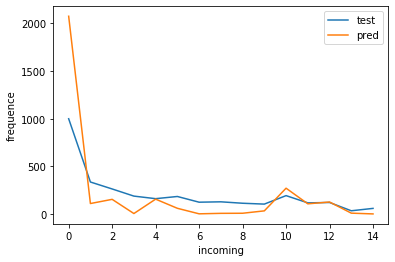

In [138]:
plt.plot(range(15),testlist,label="test")
plt.plot(range(15),predlist,label="pred")
plt.xlabel('incoming')
plt.ylabel('frequence')
plt.legend()

Text(0.5, 1.0, 'incoming-frequence')

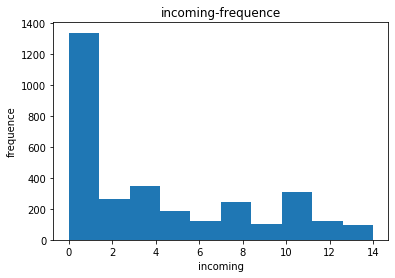

In [139]:
plt.hist(y_test)
plt.xlabel('incoming')
plt.ylabel('frequence')
plt.title("incoming-frequence")


Text(0.5, 1.0, 'incoming-frequence')

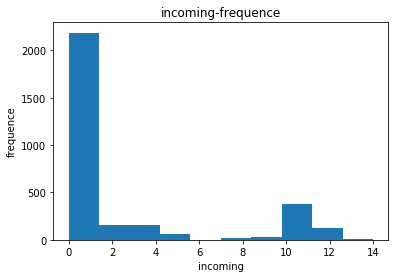

In [140]:
plt.hist(y_pred)
plt.xlabel('incoming')
plt.ylabel('frequence')
plt.title("incoming-frequence")

Text(0.5, 1.0, 'incoming-frequency')

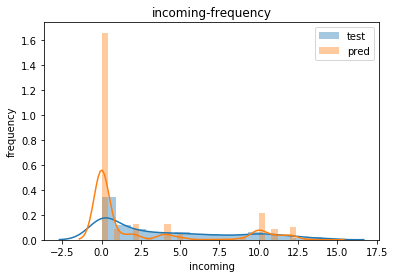

In [142]:
sns.distplot(y_test,label="test")
sns.distplot(y_pred,label="pred")
plt.legend()
plt.xlabel('incoming')
plt.ylabel('frequency')
plt.title("incoming-frequency")